# MEPS Cancer Analysis (2019)

This project explores differences between individuals **with and without cancer**, as well as **across different types of cancer**, using data from the Medical Expenditure Panel Survey (MEPS).

The analysis focuses on how these groups differ in terms of:

1. **Sociodemographic characteristics** (e.g., age, sex, income, race/ethnicity, education)
1. **Quality of life**
1. **Mental health** (e.g., psychological distress, depression scores)
1. **Healthcare burden** (e.g., medical expenditures, missed work)
1. **Access to care** (e.g., insurance coverage, ability to get treatment)

All analyses are descriptive and exploratory, aiming to highlight potential disparities and patterns among cancer patients.

# Data Loading & Imports

In [1]:
%reload_ext autoreload
%autoreload 2  

In [2]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from pltstat import twofeats as tf
from pltstat import singlefeat as sf
from pltstat import multfeats as mf
from pltstat import cm

C:\Users\forth\PycharmProjects\meps-cancer-analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'modules')))

In [4]:
import plots

In [5]:
# Settings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [6]:
# Data loading
df = pd.read_stata("data/h216.dta")
df.shape

(28512, 1447)

In [7]:
df.head()

DUID  PID    DUPERSID        PANEL FAMID31 FAMID42 FAMID53 FAMID19  \
0  2320002  101  2320002101  23 PANEL 23       B       B       B       B   
1  2320002  102  2320002102  23 PANEL 23       A       A       A       A   
2  2320002  103  2320002103  23 PANEL 23       A       A       A       A   
3  2320005  101  2320005101  23 PANEL 23       A       A       A       A   
4  2320005  102  2320005102  23 PANEL 23       A       A       A       A   

  FAMIDYR CPSFAMID             FCSZ1231                  FCRP1231 RULETR31  \
0       B        B  1 NUMBER OF PERSONS        1 REFERENCE PERSON        B   
1       A        A  2 NUMBER OF PERSONS        1 REFERENCE PERSON        A   
2       A        A  2 NUMBER OF PERSONS  0 NOT A REFERENCE PERSON        A   
3       A        A  2 NUMBER OF PERSONS        1 REFERENCE PERSON        A   
4       A        A  2 NUMBER OF PERSONS  0 NOT A REFERENCE PERSON        A   

  RULETR42 RULETR53 RULETR19         RUSIZE31         RUSIZE42  \
0        B        B        B   1 PERSON IN RU   1 PERSON IN RU   
1        A        A        A  2 PERSONS IN RU  2 PERSONS IN RU   
2        A        A        A  2 PERSONS IN RU  2 PERSONS IN RU   
3        A        A        A  2 PERSONS IN RU  2 PERSONS IN RU   
4        A        A        A  2 PERSONS IN RU  2 PERSONS IN RU   

          RUSIZE53         RUSIZE19       RUCLAS31       RUCLAS42  \
0   1 PERSON IN RU   1 PERSON IN RU  1 STANDARD RU  1 STANDARD RU   
1  2 PERSONS IN RU  2 PERSONS IN RU  1 STANDARD RU  1 STANDARD RU   
2  2 PERSONS IN RU  2 PERSONS IN RU  1 STANDARD RU  1 STANDARD RU   
3  2 PERSONS IN RU  2 PERSONS IN RU  1 STANDARD RU  1 STANDARD RU   
4  2 PERSONS IN RU  2 PERSONS IN RU  1 STANDARD RU  1 STANDARD RU   

        RUCLAS53       RUCLAS19   FAMSZE31   FAMSZE42   FAMSZE53   FAMSZE19  \
0  1 STANDARD RU  1 STANDARD RU   1 PERSON   1 PERSON   1 PERSON   1 PERSON   
1  1 STANDARD RU  1 STANDARD RU  2 PERSONS  2 PERSONS  2 PERSONS  2 PERSONS   
2  1 STANDARD RU  1 STANDARD RU  2 PERSONS  2 PERSONS  2 PERSONS  2 PERSONS   
3  1 STANDARD RU  1 STANDARD RU  2 PERSONS  2 PERSONS  2 PERSONS  2 PERSONS   
4  1 STANDARD RU  1 STANDARD RU  2 PERSONS  2 PERSONS  2 PERSONS  2 PERSONS   

                    FMRS1231   FAMS1231   FAMSZEYR                  FAMRFPYR  \
0  1 RESPONDING 12/31 FAMILY   1 PERSON   1 PERSON        1 REFERENCE PERSON   
1  1 RESPONDING 12/31 FAMILY  2 PERSONS  2 PERSONS        1 REFERENCE PERSON   
2  1 RESPONDING 12/31 FAMILY  2 PERSONS  2 PERSONS  0 NOT A REFERENCE PERSON   
3  1 RESPONDING 12/31 FAMILY  2 PERSONS  2 PERSONS        1 REFERENCE PERSON   
4  1 RESPONDING 12/31 FAMILY  2 PERSONS  2 PERSONS  0 NOT A REFERENCE PERSON   

      REGION31     REGION42     REGION53     REGION19  REFPRS31  REFPRS42  \
0    2 MIDWEST    2 MIDWEST    2 MIDWEST    2 MIDWEST       101       101   
1    2 MIDWEST    2 MIDWEST    2 MIDWEST    2 MIDWEST       102       102   
2    2 MIDWEST    2 MIDWEST    2 MIDWEST    2 MIDWEST       102       102   
3  1 NORTHEAST  1 NORTHEAST  1 NORTHEAST  1 NORTHEAST       101       101   
4  1 NORTHEAST  1 NORTHEAST  1 NORTHEAST  1 NORTHEAST       101       101   

   REFPRS53  REFPRS19                      RESP31                      RESP42  \
0       101       101     1 YES, FIRST RESPONDENT     1 YES, FIRST RESPONDENT   
1       102       102     1 YES, FIRST RESPONDENT     1 YES, FIRST RESPONDENT   
2       102       102  2 NO, NOT FIRST RESPONDENT  2 NO, NOT FIRST RESPONDENT   
3       101       101     1 YES, FIRST RESPONDENT     1 YES, FIRST RESPONDENT   
4       101       101  2 NO, NOT FIRST RESPONDENT  2 NO, NOT FIRST RESPONDENT   

                       RESP53                      RESP19  \
0     1 YES, FIRST RESPONDENT     1 YES, FIRST RESPONDENT   
1     1 YES, FIRST RESPONDENT     1 YES, FIRST RESPONDENT   
2  2 NO, NOT FIRST RESPONDENT  2 NO, NOT FIRST RESPONDENT   
3     1 YES, FIRST RESPONDENT     1 YES, FIRST RESPONDENT   
4  2 NO, NOT FIRST RESPONDENT  2 NO, NOT FIRST RESPONDENT

# Cancer Types & Distribution

In this section, we will explore the cancer types present in the dataset and analyze their distribution. 

The key features related to cancer in the dataset are:

1. **Cancer diagnosis (`CANCERDX`)**: The main feature indicating whether the individual has been diagnosed with cancer.
1. **Cancer Types (`cancer_types`)**: A list of specific cancer types present in the data:

Feature | Description
--|--
**`CANCERDX`** | **CANCER DIAGNOSIS - ANY (>17)**
`CABLADDR` | CANCER DIAGNOSED - **BLADDER** (>17)
`CABREAST` | CANCER DIAGNOSED - **BREAST** (>17)
`CACERVIX` | CANCER DIAGNOSED - **CERVICAL** (>17)
`CACOLON` | CANCER DIAGNOSED - **COLON** (>17)
`CALUNG` | CANCER DIAGNOSED - **LUNG** (>17)
`CALYMPH` | CANCER DIAGNOSED - **LYMPHOMA (NONHODGKIN'S)** (>17)
`CAMELANO` | CANCER DIAGNOSED - **SKIN MELANOMA** (>17)
`CAOTHER` | CANCER DIAGNOSED - **OTHER** (>17)
`CAPROSTA` | CANCER DIAGNOSED - **PROSTATE** (>17)
`CASKINNM` | CANCER DIAGNOSED - **SKIN-NONMELANO** (>17)
`CASKINDK` | CANCER DIAGNOSED - **SKIN-UNKNOWN TYPE** (>17)
`CAUTERUS` | CANCER DIAGNOSED - **UTERINE** (>17) 

We will analyze the distribution of these cancer types and investigate how they are represented in the dataset.

In [8]:
cancer_feat = 'CANCERDX'
cancer_types = ['CABLADDR', 'CABREAST', 'CACERVIX', 'CACOLON', 'CALUNG', 'CALYMPH', 'CAMELANO', 'CAOTHER', 'CAPROSTA', 'CASKINNM', 'CASKINDK', 'CAUTERUS']

In [9]:
# cancer_type_names = ['BLADDER', 'BREAST', 'CERVICAL', 'COLON', 'LUNG', 'LYMPHOMA', 'SKIN MELANOMA', 'OTHER', 'PROSTATE', 'SKIN-NONMELANO', 'SKIN-UNKNOWN TYPE', 'UTERINE']
cancer_type_names = ['Bladder', 'Breast', 'Cervical', 'Colon', 'Lung', 'Lymphoma', 'Skin\nMelanoma', 'Other', 'Prostate', 'Skin\nNon-melanoma', 'Skin\nUnknown type', 'Uterine']
# cancer_type_names = ['BLADDER', 'BREAST', 'CERVICAL', 'COLON', 'LUNG', 'LYMPHOMA', 'SKIN', 'OTHER', 'PROSTATE', 'SKIN', 'SKIN', 'UTERINE']

**1. Cancer Diagnosis**

In [10]:
df[cancer_feat].head()

0               2 NO
1               2 NO
2    -1 INAPPLICABLE
3               2 NO
4               2 NO
Name: CANCERDX, dtype: category
Categories (6, object): ['-15 CANNOT BE COMPUTED' < '-8 DK' < '-7 REFUSED' < '-1 INAPPLICABLE' < '1 YES' < '2 NO']

In [11]:
df[cancer_feat].value_counts()

CANCERDX
2 NO                      19088
-1 INAPPLICABLE            6669
1 YES                      2617
-15 CANNOT BE COMPUTED      111
-7 REFUSED                   17
-8 DK                        10
Name: count, dtype: int64

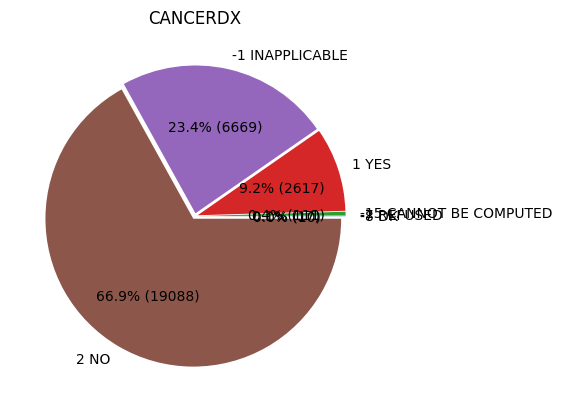

In [12]:
sf.pie(df['CANCERDX'])

In [13]:
df[cancer_feat].value_counts()

CANCERDX
2 NO                      19088
-1 INAPPLICABLE            6669
1 YES                      2617
-15 CANNOT BE COMPUTED      111
-7 REFUSED                   17
-8 DK                        10
Name: count, dtype: int64

**Data cleaning**

Change **categorical** columns to object **type**

In [14]:
df_cat = df.select_dtypes('category')
df[df_cat.columns] = df_cat.astype('object')
del df_cat

We **drop patients** with invalid or inapplicable responses in cancer-related variables. Specifically, we remove the following values:

- `-1 INAPPLICABLE` – e.g., patients under 18 years old  
- `-15 CANNOT BE COMPUTED`  
- `-8 DK (Don't know)`  
- `-7 REFUSED`

Patients under 18 years old are not included in the analysis.  
The last three categories represent very small subgroups and are not relevant for the analysis. These entries do not provide reliable information and are therefore excluded.

In [15]:
vals_to_drop = ['-1 INAPPLICABLE', '-15 CANNOT BE COMPUTED', '-8 DK', '-7 REFUSED']

In [16]:
df = df.loc[~df[cancer_feat].isin(vals_to_drop), :]

In [17]:
no_ans = '2. No'
yes_ans = '1. Yes'
df[cancer_feat] = df[cancer_feat].replace({'1 YES': yes_ans, '2 NO': no_ans})

In [18]:
# df[cancer_feat].cat.remove_unused_categories()
df[cancer_feat].value_counts()

CANCERDX
2. No     19088
1. Yes     2617
Name: count, dtype: int64

**2. Cancer Types**

In [19]:
cancer_bool_types = [f'{col}_bool' for col in cancer_types]
df[cancer_bool_types] = df.loc[:, cancer_types] == '1 YES'

**Number of cancer types per patient (`'CANCERDX_mult'` feature):**

In [20]:
df[cancer_bool_types].sum(axis=1).value_counts()

0    19098
1     2455
2      129
3       21
4        2
Name: count, dtype: int64

In [21]:
cancer_mult = 'CANCERDX_mult'
df[cancer_mult] = df.loc[:, cancer_bool_types].sum(axis=1)
df[cancer_mult].value_counts()

CANCERDX_mult
0    19098
1     2455
2      129
3       21
4        2
Name: count, dtype: int64

We create a **new feature** (`CANCERDX_type`) that indicates the specific type of cancer a patient has (if any).  
- If the patient has **no** cancer, the value is `"2. No"`  
- If the patient has **exactly one type** of cancer, the value reflects that type `1. Type`  
- If the patient has **multiple cancer types**, the value is `"0. Multiple"`  

This helps to simplify the representation of cancer diagnosis for each individual.

In [22]:
mult_ans = '0. Multiple'

In [23]:
cancer_feat_type = 'CANCERDX_type'
df[cancer_feat_type] = df.loc[:, cancer_feat]

for bool_type, type_name in zip(cancer_bool_types, cancer_type_names):
    df.loc[df[bool_type], cancer_feat_type] = f'1. {type_name}'

df.loc[df.loc[:, cancer_mult] > 1, cancer_feat_type] = mult_ans

df[cancer_feat_type] = df[cancer_feat_type].replace({'2 NO': no_ans})

In [24]:
df[cancer_feat_type].value_counts().sort_index()

CANCERDX_type
0. Multiple                152
1. Bladder                  42
1. Breast                  370
1. Cervical                127
1. Colon                   105
1. Lung                     53
1. Lymphoma                 57
1. Other                   463
1. Prostate                286
1. Skin\nMelanoma          252
1. Skin\nNon-melanoma      475
1. Skin\nUnknown type      157
1. Uterine                  68
1. Yes                      10
2. No                    19088
Name: count, dtype: int64

10 patients answered "Yes" to having cancer (`CANCERDX = '1. Yes'`), but none of the specific cancer type flags were marked. Please check these cases:

In [25]:
df.loc[df[cancer_feat_type]==yes_ans, cancer_types]

,CABLADDR,CABREAST,CACERVIX,CACOLON,CALUNG,CALYMPH,CAMELANO,CAOTHER,CAPROSTA,CASKINNM,CASKINDK,CAUTERUS
7171,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-1 INAPPLICABLE,-8 DK,-8 DK,-8 DK
14888,-8 DK,-8 DK,-1 INAPPLICABLE,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-1 INAPPLICABLE
15510,-7 REFUSED,-7 REFUSED,-1 INAPPLICABLE,-7 REFUSED,-7 REFUSED,-7 REFUSED,-7 REFUSED,-7 REFUSED,-7 REFUSED,-7 REFUSED,-7 REFUSED,-1 INAPPLICABLE
15517,-8 DK,-8 DK,-1 INAPPLICABLE,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-1 INAPPLICABLE
19263,-8 DK,-8 DK,-1 INAPPLICABLE,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-1 INAPPLICABLE
19366,-8 DK,-8 DK,-1 INAPPLICABLE,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-1 INAPPLICABLE
22915,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-1 INAPPLICABLE,-8 DK,-8 DK,-8 DK
24315,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-1 INAPPLICABLE,-8 DK,-8 DK,-8 DK
26533,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-1 INAPPLICABLE,-8 DK,-8 DK,-8 DK
27241,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-1 INAPPLICABLE,-8 DK,-8 DK,-8 DK


Based on this inconsistency, we assign them a new category:

- `'1. DK / Refused'` — indicating that the patient confirmed a cancer diagnosis, but did not specify the type (possibly due to "Don't know" or "Refused" answers).

This allows us to retain these records without misclassifying their cancer status.

In [26]:
df[cancer_feat_type] = df[cancer_feat_type].replace({yes_ans: '1. DK / Refused'})

Replace invalid or missing values in cancer_type columns with None for proper data handling:

In [27]:
df[cancer_types] = df[cancer_types].replace({'-8 DK': None, '-7 REFUSED': None})
# Inapplicable when CANCERDX is No
df[cancer_types] = df[cancer_types].replace({'2 NO': no_ans, '-1 INAPPLICABLE': no_ans})
df[cancer_types] = df[cancer_types].replace({'1 YES': yes_ans})

Rename the columns to readable names:

In [28]:
df[cancer_type_names] = df[cancer_types]
df = df.drop(columns=cancer_types)

In [29]:
cancer_types = cancer_type_names

**Finally, let's review the final features:** 
* Cancer diagnosis (`CANCERDX`)
* Cancer type (`CANCERDX_type`)
* Cancer types separately Yes/No (`cancer_types` list).

In [30]:
df[cancer_feat].value_counts()

CANCERDX
2. No     19088
1. Yes     2617
Name: count, dtype: int64

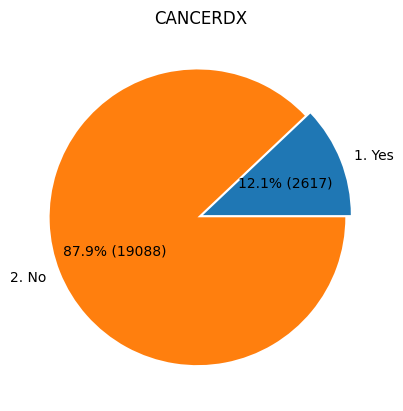

In [31]:
sf.pie(df[cancer_feat])

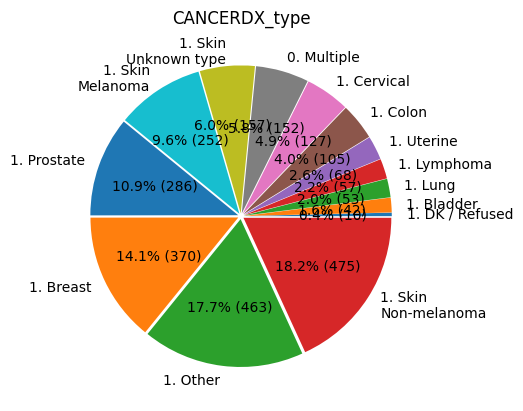

In [32]:
sf.pie(df.loc[df[cancer_feat_type]!=no_ans, cancer_feat_type])

* and 19088 patients who responded **No**:

In [33]:
df[cancer_feat_type].value_counts().sort_index()

CANCERDX_type
0. Multiple                152
1. Bladder                  42
1. Breast                  370
1. Cervical                127
1. Colon                   105
1. DK / Refused             10
1. Lung                     53
1. Lymphoma                 57
1. Other                   463
1. Prostate                286
1. Skin\nMelanoma          252
1. Skin\nNon-melanoma      475
1. Skin\nUnknown type      157
1. Uterine                  68
2. No                    19088
Name: count, dtype: int64

Cancer types:

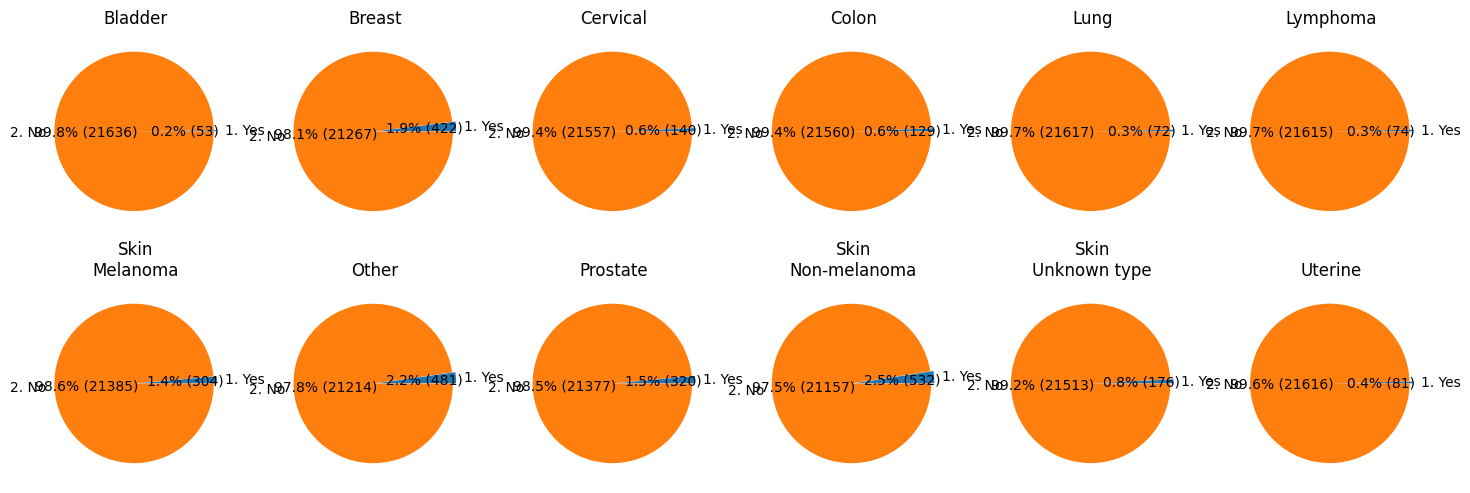

In [34]:
n_types = len(cancer_types)
fig, ax = plt.subplots(2, 6, figsize=(18, 6))
for i in range(n_types):
    sf.pie(df[cancer_types[i]], ax=ax[i//6, i%6])

## Conclusion

1. **Cancer diagnosis distribution (`CANCERDX`):**
- **"No"** (19088) — the vast majority of patients do not have cancer.
- **"Yes"** (2617) — the number of patients diagnosed with cancer is much smaller, which is typical in such datasets.

2. **Distribution of cancer types (`CANCERDX_type`):**
- **"No"** (19088) — the majority of patients do not have cancer, which is expected since most people will not be diagnosed with cancer.
- **"Multiple"** (152) — a small group of patients who have multiple types of cancer. This data will be useful when analyzing multi-cancer cases.
- **Skin Non-melanoma** (475) and **Other** (463) — these categories have the highest counts, which may indicate a diverse range of cancer cases in these groups.
- **Breast** (370), **Prostate** (286), and **Skin Melanoma** (252) — these are also among the more common cancer types, likely reflecting their higher prevalence in the population.
- **Smaller groups**: Cancer types like **Bladder** (42), **Uterine** (68), **Lung** (53), **Lymphoma** (57), and **Cervical** (127) represent rarer cancer types.
- **DK / Refused** (10) — these patients reported having cancer but did not specify the type. This group may be difficult to analyze, but the data can be useful for clarification.

In general, these distributions reflect typical real-world patterns: many patients without cancer, a few dominant cancer types, and smaller groups of rare cancer types.

# Demographics

The following features can be explored to analyze demographic characteristics:
1. **Age** — patient's age (`AGELIST`).
2. **Sex** — patient's sex (`SEX`).
3. **Race** — race (`RACEV1X`).

## Age

Age overview:

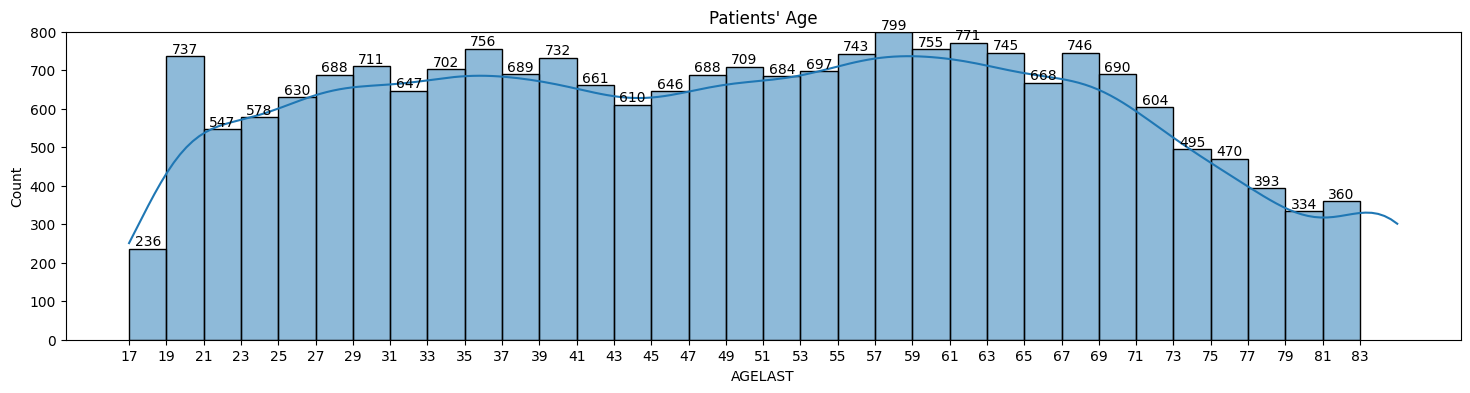

In [35]:
bins = np.arange(df['AGELAST'].min(), df['AGELAST'].max(), 2)

sf.histplot(
    df['AGELAST'], 
    figsize=(18, 4), 
    bins=bins,
    is_limits=True,
)
plt.title("Patients' Age")
plt.xticks(bins);

In [36]:
df['AGELAST'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
AGELAST,21705.0,50.026492,18.539892,17.0,34.0,50.0,65.0,85.0


### Cancer diagnosis

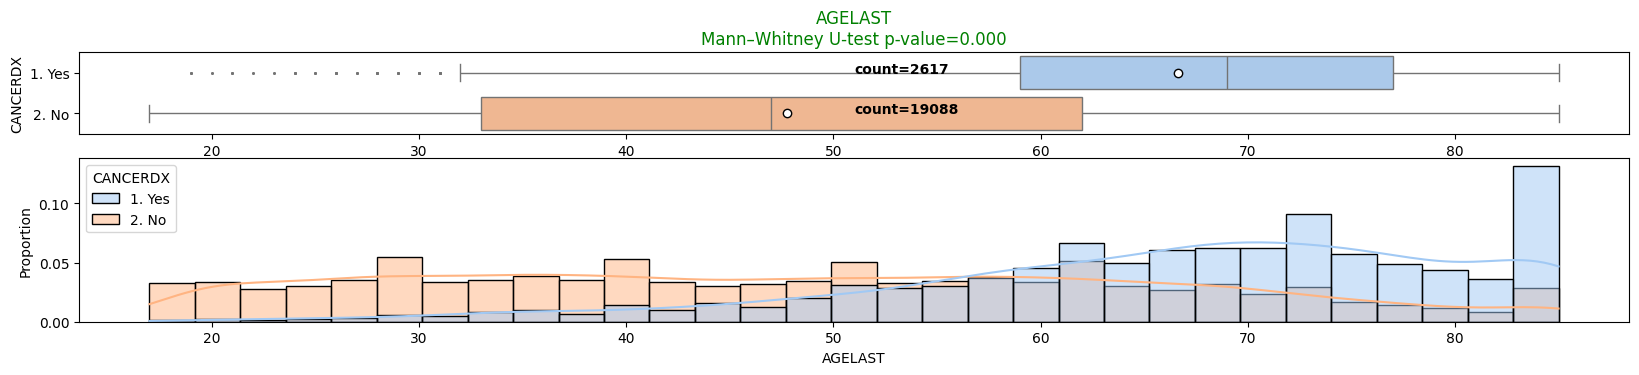

In [37]:
tf.dis_box_plot(df, cancer_feat, 'AGELAST', stat='proportion')

In [38]:
df.groupby(cancer_feat)['AGELAST'].describe()

,count,mean,std,min,25%,50%,75%,max
CANCERDX,,,,,,,,
1. Yes,2617.0,66.625908,13.713160,19.0,59.0,69.0,77.0,85.0
2. No,19088.0,47.750681,17.947798,17.0,33.0,47.0,62.0,85.0


#### Conclusion
* Patients with a cancer diagnosis are **significantly older** than those without a reported cancer history (**median age 69 vs. 47**). This difference is statistically significant (**p < 0.001** via the Mann–Whitney test). This is expected, as the risk of developing cancer increases with age. This trend can be largely explained by the cumulative accumulation of genetic mutations over time ([Tomasetti & Vogelstein, 2015](https://doi.org/10.1126/science.1260825)), and prolonged exposure to carcinogenic factors such as smoking, UV radiation, or environmental pollution ([White et al., 2014](https://doi.org/10.1016/j.amepre.2013.10.029)).

### Cancer types

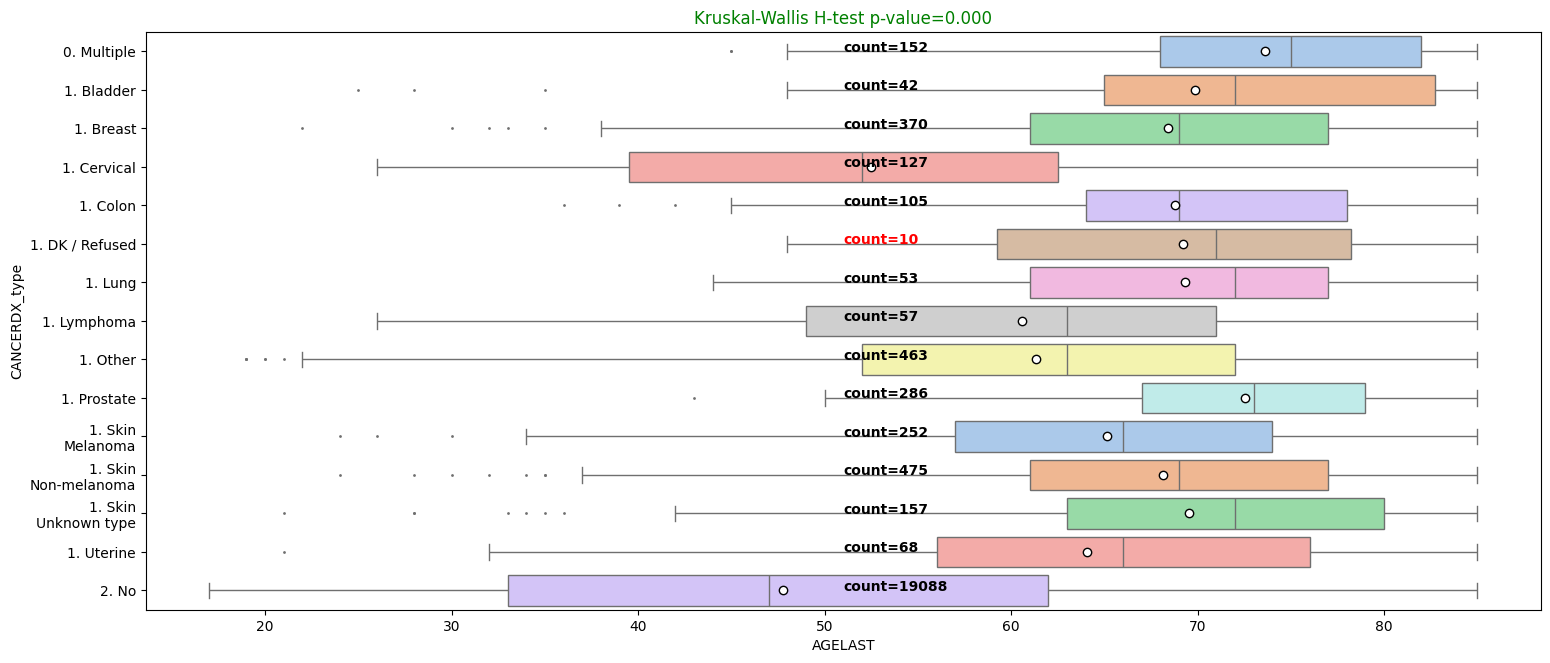

In [39]:
tf.boxplot(df, cancer_feat_type, 'AGELAST')

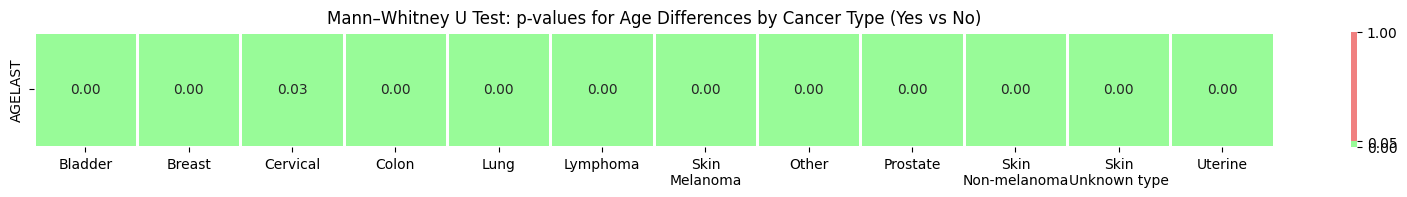

In [40]:
mf.pvals_num_cat(df, cat_cols=cancer_types, num_cols=['AGELAST'], method='mw', is_T=True, figsize=(20, 1.5))
plt.title("Mann–Whitney U Test: p-values for Age Differences by Cancer Type (Yes vs No)");

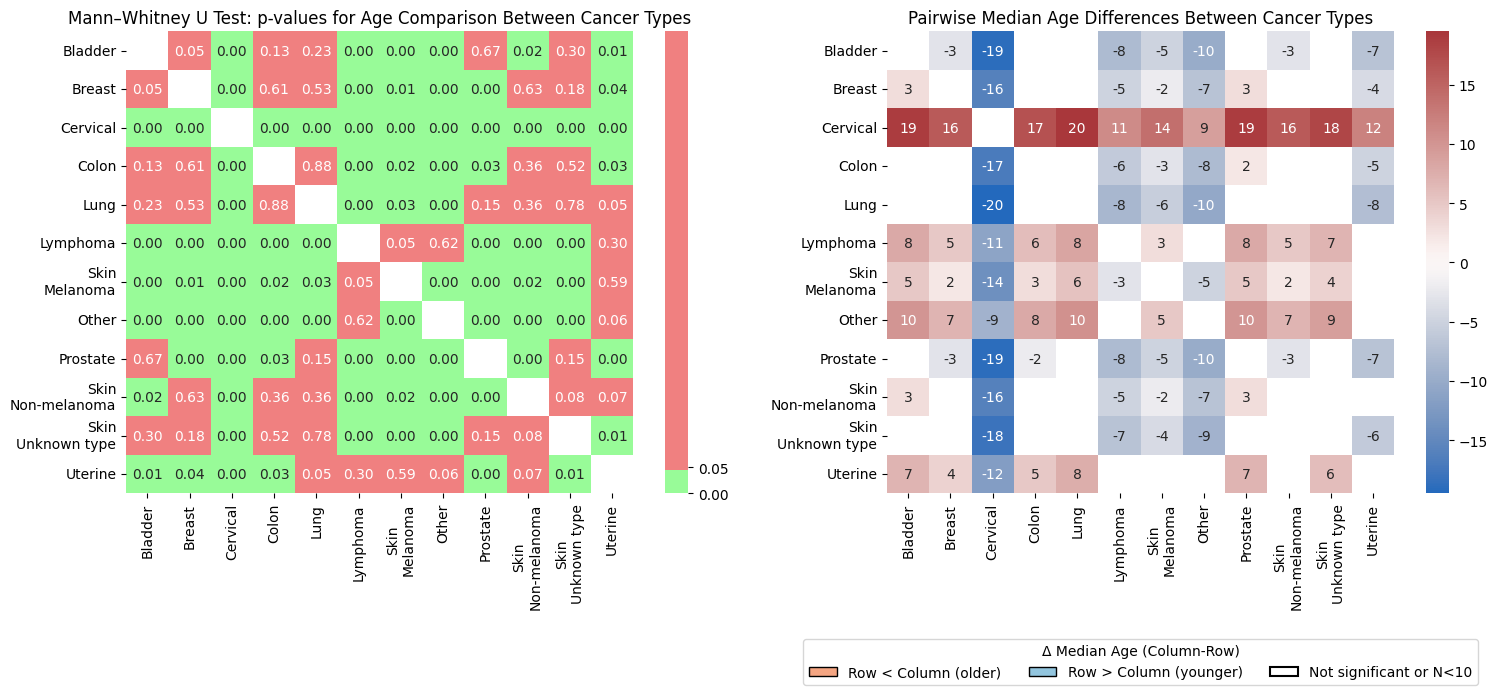

In [41]:
ax = plots.pairwise_mw(df, features=cancer_types, key_value=yes_ans, cont_feat='AGELAST')
plots.customize_mw_pairwise_age(ax)

In [42]:
df.groupby(cancer_feat_type)['AGELAST'].describe().round(0).sort_values('50%')

,count,mean,std,min,25%,50%,75%,max
CANCERDX_type,,,,,,,,
2. No,19088.0,48.0,18.0,17.0,33.0,47.0,62.0,85.0
1. Cervical,127.0,53.0,16.0,26.0,40.0,52.0,62.0,85.0
1. Other,463.0,61.0,16.0,19.0,52.0,63.0,72.0,85.0
1. Lymphoma,57.0,61.0,16.0,26.0,49.0,63.0,71.0,85.0
1. Skin\nMelanoma,252.0,65.0,13.0,24.0,57.0,66.0,74.0,85.0
1. Uterine,68.0,64.0,15.0,21.0,56.0,66.0,76.0,85.0
1. Colon,105.0,69.0,12.0,36.0,64.0,69.0,78.0,85.0
1. Breast,370.0,68.0,12.0,22.0,61.0,69.0,77.0,85.0
1. Skin\nNon-melanoma,475.0,68.0,12.0,24.0,61.0,69.0,77.0,85.0


#### Conclusion
<font color='blue'><p style="font-size:16px;">**Key Observations on Patient Age by Cancer Type**</p></font>  

1. **Average Age**:  
   - Patients **without cancer ("No")** are the youngest group, with a mean age of **48 years**.  
   - Cancer patients are significantly older on average. Notable examples:  
     - **"Multiple" cancers**: Oldest group (**74 years**).  
     - **Prostate cancer**: **73 years**.  
     - **Bladder cancer**: **70 years**.  
     - **Cervical cancer**: Youngest cancer group (**53 years**).  

2. **Age Variability (Standard Deviation)**:  
   - Highest variability in **"Cervical" (std=16)**, **"Lymphoma" (16)**, **"Other" (16)**, and **"Uterine" (15)**, indicating a wide age range.  
   - Lowest variability in **"Prostate" (std=8)** and **"Multiple" (10)**, suggesting a more concentrated age distribution.  

3. **Min/Max Age**:  
   - **Maximum age** is consistently **85 years** across all groups.  
   - **Minimum age** varies:  
     - Youngest patients: **"Other" cancers (19)**, **"Uterine" (21)**, and **"Cervical" (26)**.  
     - Oldest minimum age: **"Multiple" cancers (45)**.  

4. **Median Age**:  
   - Confirms trends in mean age:  
     - **Prostate**: **73 years**.  
     - **Cervical**: **52 years**.  
     - **No cancer**: **47 years**.  

5. **Group-Specific Insights**:  
   - **Cervical cancer**: Youngest cohort, aligning with epidemiology (often affects younger women).  
   - **Prostate/Multiple cancers**: Oldest groups, expected due to age-related risk.  
   - **No cancer**: Much younger, reflecting lower risk in younger populations.  

6. **Potential Outliers**:  
   - Unusually young patients in **"Bladder" (25)**, **"Breast" (22)**, and **"Other" (19)** may indicate rare early-onset cases or data noise.  

**Conclusion**:  
Age distribution varies markedly by cancer type. Most cancers skew older (especially prostate and multiple cancers), while cervical cancer is an exception. Non-cancer patients are significantly younger, underscoring the link between aging and cancer risk. High variability in some groups (e.g., cervical, lymphoma) suggests diverse at-risk populations.  

---

<font color='blue'><p style="font-size:16px;">**Statistical Analysis and General Conclusion**</p></font>

There are statistically significant differences in age across different cancer types (*Kruskal–Wallis p* < 0.001). As expected, cancers such as **multiple cancers**, **prostate**, and **bladder** are associated with older age (median age 75, 73, and 72, respectively). In contrast, cancers like **cervical** and **uterine** tend to occur at younger ages (median 52 and 66), which aligns with their known epidemiology.

These patterns reflect the biological and epidemiological characteristics of each cancer type. For instance:

- **Prostate and bladder cancers** predominantly affect older men due to genetics, cumulative exposure, and other risk factors ([Cancer Research UK](https://www.cancerresearchuk.org/health-professional/cancer-statistics/statistics-by-cancer-type)).
- **Cervical cancer** often appears earlier due to its association with HPV infection, which typically occurs in early adulthood ([CDC HPV and Cancer](https://www.cdc.gov/cancer/hpv/basic-information.html).
- **Uterine cancer** risk increases after menopause but still tends to be diagnosed earlier than many other types ([American Cancer Society](https://www.cancer.org/cancer/types/endometrial-cancer/about/key-statistics.html)).

---

<font color='blue'><p style="font-size:16px;">**Age Distribution vs. Expected Epidemiology by Cancer Type**</p></font>

**1. Expected Patterns (Matches Epidemiology):**
- Prostate Cancer (Mean: 73)
- Cervical Cancer (Mean: 53)
- Lung Cancer (Mean: 69)
- Colon Cancer (Mean: 69)
- Breast Cancer (Mean: 68)

**2. Deviations from Expectations**
- **Bladder Cancer (Mean: 70)**:  
  - **Epidemiology**: Typically **70+**, but data shows a **young outlier (min=25)**.  
  - **Possible Explanation**: Rare aggressive subtypes (e.g., in smokers <40) or misclassification.

- **Non-Hodgkin’s Lymphoma (Mean: 61)**:  
  - **Epidemiology**: Broad range (20s–80s); Hodgkin’s peaks young (\~30s), Non-Hodgkin’s older (\~65).  
  - **Data Gap**: Unclear subtype split; median 63 suggests mix, but high std (16) implies heterogeneity.

- **Uterine Cancer (Mean: 64)**:  
  - **Epidemiology**: Two types:  
    - Endometrial (postmenopausal, ~60s).  
    - Sarcomas (younger, ~40s).  
  - **Data Note**: Median 66 aligns with endometrial dominance, but min=21 suggests rare cases.

- **Melanoma (Mean: 66)**:  
  - **Epidemiology**: Common in **50+**, but rising in <40 due to UV exposure.  
  - **Data Note**: Median 66 fits, but min=24 highlights younger risk groups.

**3. Notable Outliers**
- **"Other" Cancers (Min=19)**:  
  - These may include rare and aggressive cancers, such as pediatric sarcomas or leukemias.  
- **"Multiple" Cancers (Min=45)**:  
  - Reflects accumulation of age-related mutations (expected in elderly), but no very young cases.

**4. Non-Cancer Group ("No")**  
- **Mean 48**: Much younger, as expected (cancer risk rises exponentially with age).  
- **Wide Range (17–85)**: Captures general population heterogeneity.

---

<font color='blue'><p style="font-size:20px;">**Epidemiological Takeaways**</p></font>
- **Strong Alignment**: Prostate, cervical, lung, and colon cancers match known age patterns.  
- **Red Flags**:  
  - Young bladder/uterine cases warrant scrutiny (data errors or rare subtypes?).  
  - Lymphoma’s broad range suggests unclassified subtypes.  
- **Screening Implications**:  
  - Breast cancer’s older median may reflect under-screening in younger groups.  
  - Cervical cancer’s young peak reinforces need for early HPV vaccination/screening.  

**Limitations**
- **Data Granularity**: Missing subtype details (e.g., Hodgkin’s vs. Non-Hodgkin’s lymphoma).  
- **Cultural/Screening Bias**: Older averages may reflect healthcare access patterns.  

## Sex

In [43]:
sex_feat = 'SEX'

Sex overview:

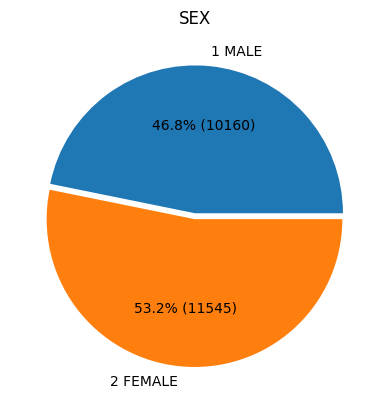

In [44]:
sf.pie(df[sex_feat])

### Cancer diagnosis

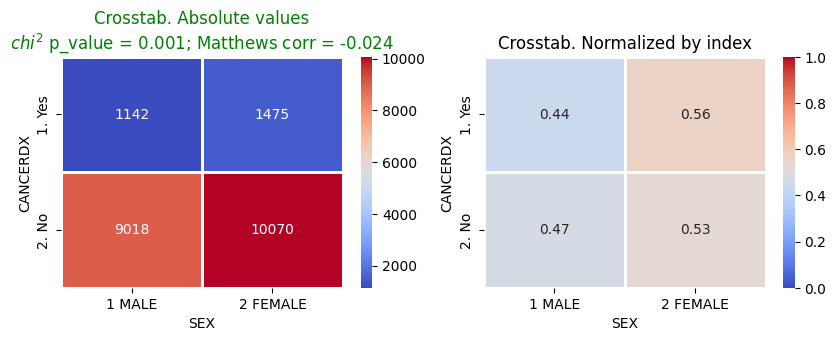

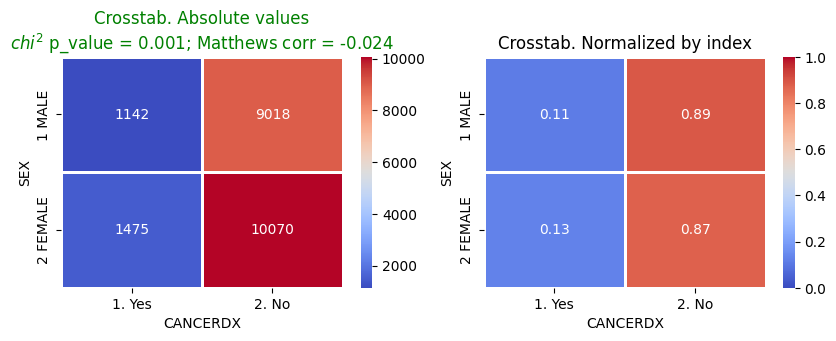

In [45]:
tf.crosstab(df, cancer_feat, sex_feat)
tf.crosstab(df, sex_feat, cancer_feat)

#### Conclusion

**Sex Distribution Among Cancer Patients**

A **statistically significant difference** is observed between males and females regarding cancer diagnosis (*p* = 0.001). The negative MCC value suggests that **a slightly higher proportion of females** are diagnosed with cancer compared to males.

This pattern **aligns with epidemiological data**:

- While **overall cancer mortality is higher in men**, **women are more frequently diagnosed** with certain types of cancer ([Siegel et al., 2022](https://acsjournals.onlinelibrary.wiley.com/doi/full/10.1002/cncr.35458)).

- **Health-seeking behavior may also play a role**—women are probably more likely to participate in routine screenings and preventive care, potentially leading to **higher diagnosis rates**

---

<font color='blue'><p style="font-size:20px;">**In summary**</p></font>
The result is statistically significant. The finding of a **slightly higher cancer prevalence among females** is consistent with real-world trends, especially when accounting for **screening practices**, **gender-specific cancer types**, and **healthcare access behaviors**.

### Cancer types

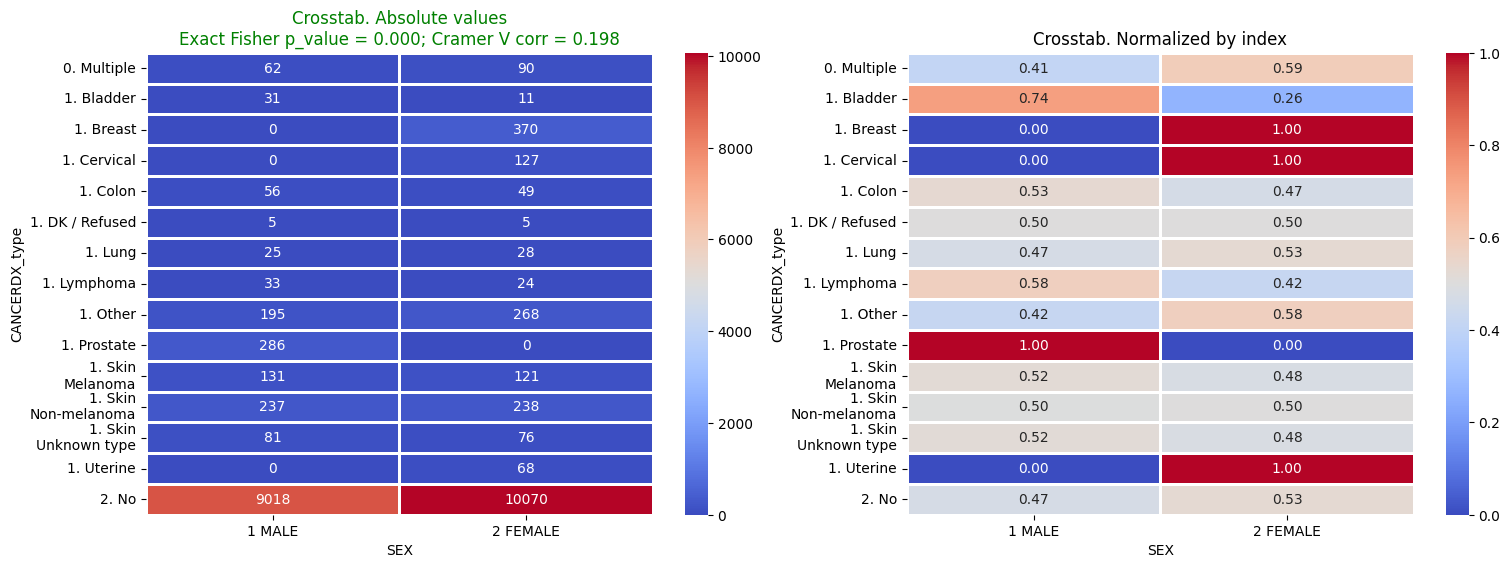

In [46]:
tf.crosstab(df, cancer_feat_type, sex_feat, figsize=(18, 6))

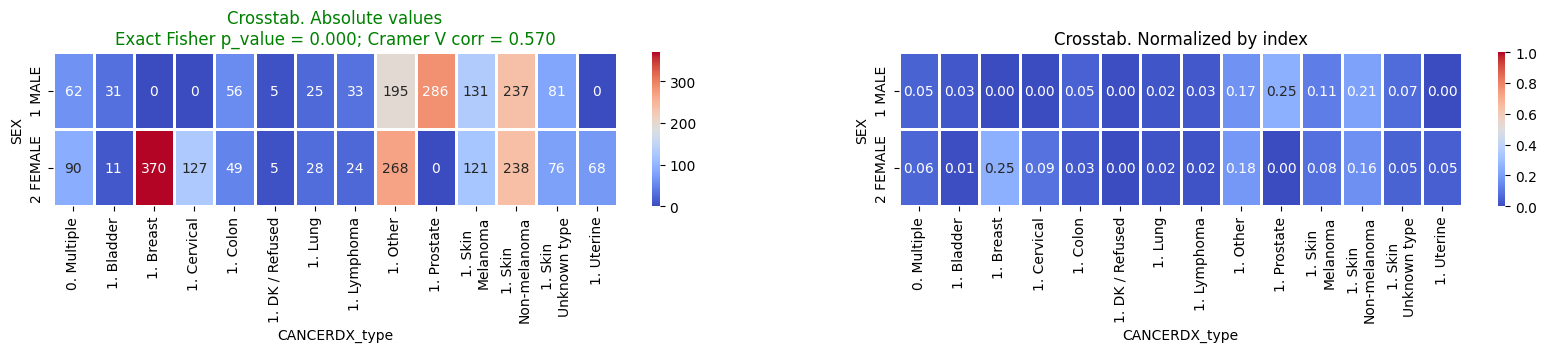

In [47]:
tf.crosstab(df[df[cancer_feat_type]!=no_ans], sex_feat, cancer_feat_type, figsize=(20, 2))

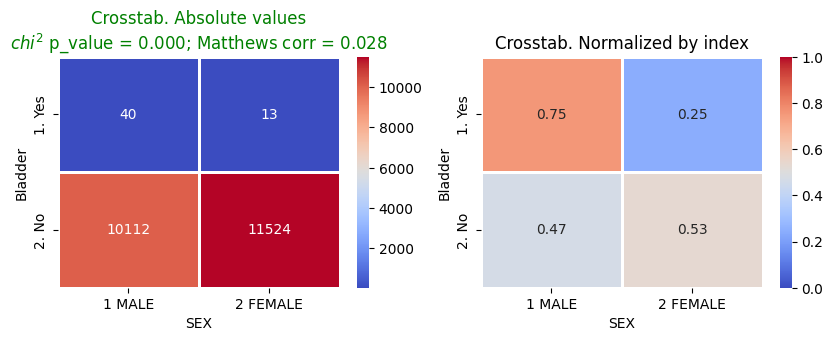

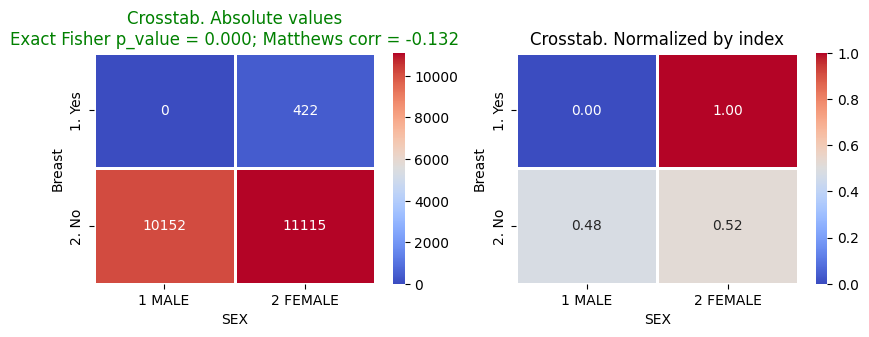

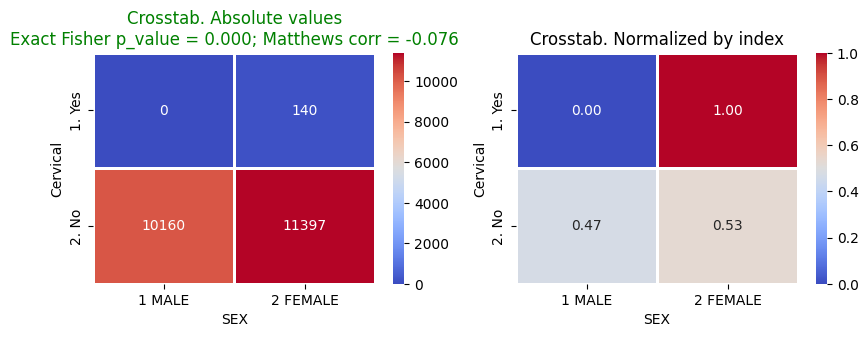

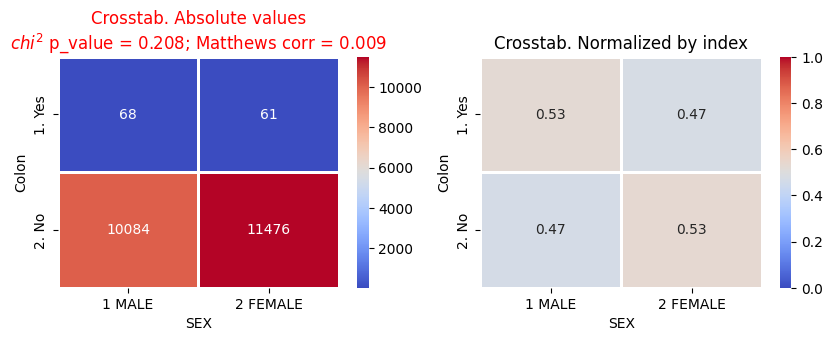

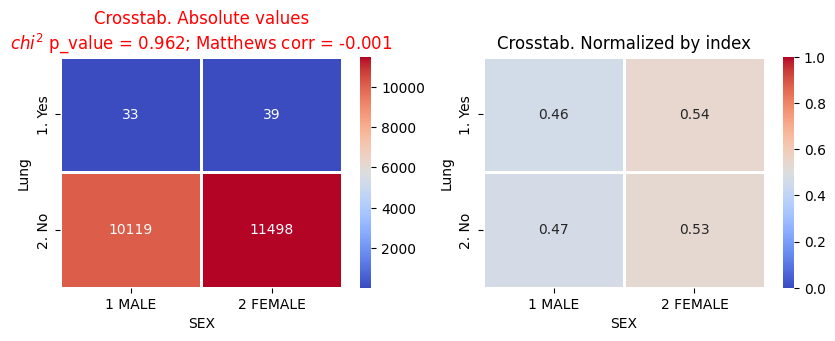

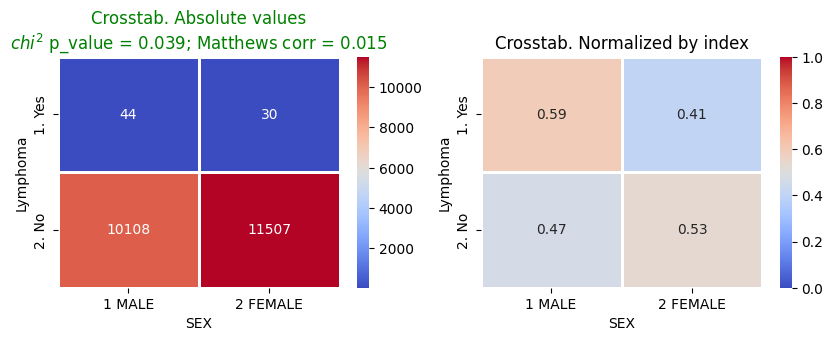

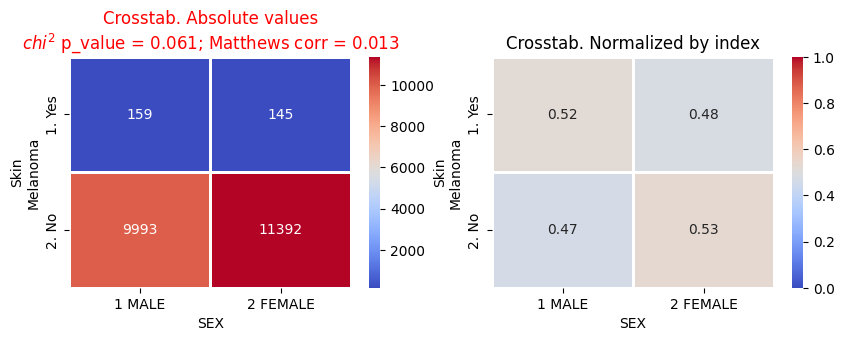

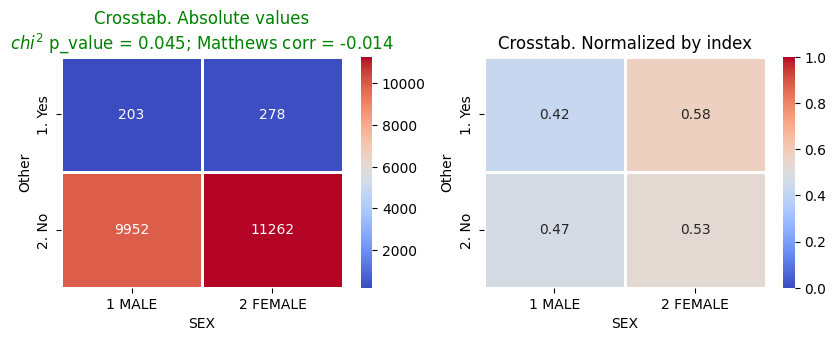

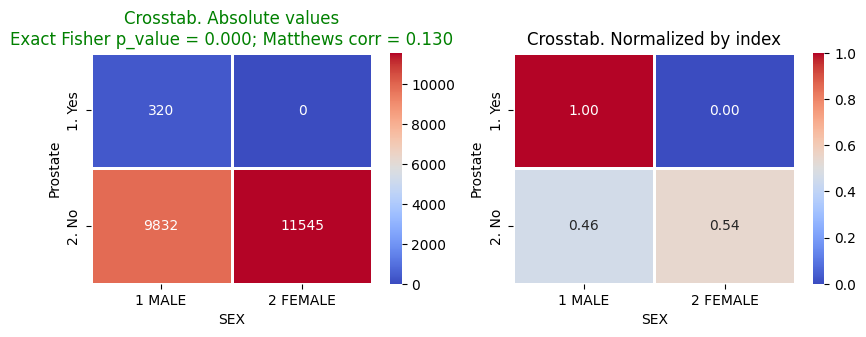

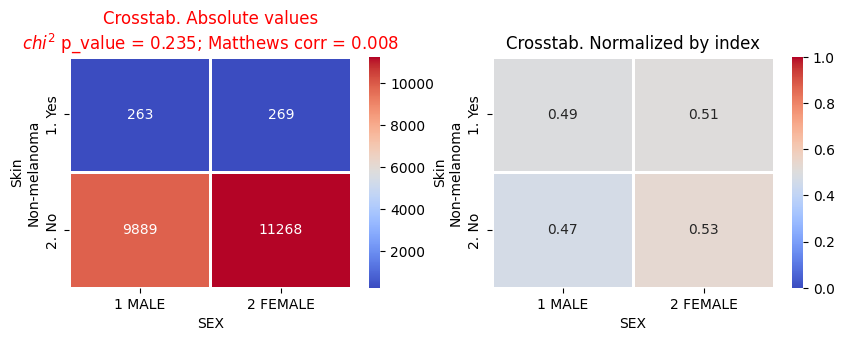

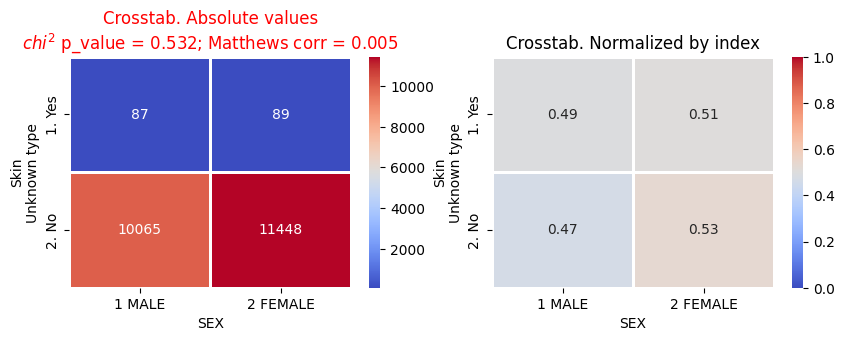

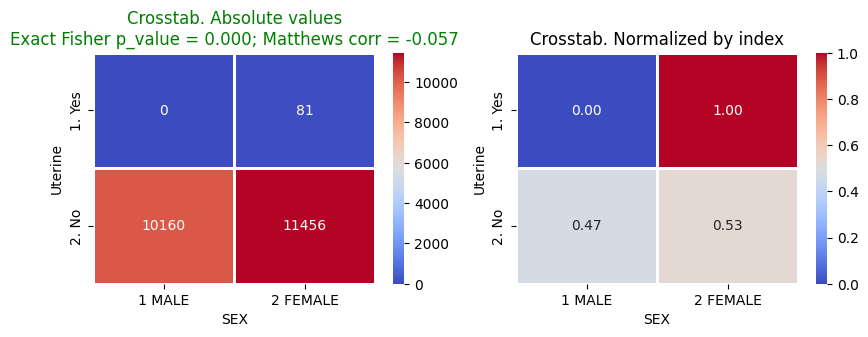

In [48]:
for col in cancer_types:
    tf.crosstab(df, col, sex_feat)

In [49]:
df.groupby(cancer_feat_type)[sex_feat].describe()

,count,unique,top,freq
CANCERDX_type,,,,
0. Multiple,152,2,2 FEMALE,90
1. Bladder,42,2,1 MALE,31
1. Breast,370,1,2 FEMALE,370
1. Cervical,127,1,2 FEMALE,127
1. Colon,105,2,1 MALE,56
1. DK / Refused,10,2,2 FEMALE,5
1. Lung,53,2,2 FEMALE,28
1. Lymphoma,57,2,1 MALE,33
1. Other,463,2,2 FEMALE,268


#### Conclusion

<font color='blue'><p style="font-size:16px;">**Sex Differences Across Cancer Types**</p></font>

We analyzed sex-based differences in diagnosis for various cancer types using 2x2 contingency tables (Cancer: Yes/No vs. Sex: Male/Female). Below are the results, including **Chi-square *p*-values and Matthews correlation coefficients** (MCC) as a measure of effect size (*No/Female-0, Yes/Male-1*).  
*MCC here is calculated using `pltstat` library and does not represent effect size, but it is useful for indicating the direction of association (i.e., whether the condition is more prevalent in men or women based on the sign).*

**Summary Table**

| Cancer Type            | chi-2 p-value | Matthews corr | Prevalent among
|------------------------|---------|----------------|----------------|
| **All Cancer (any type)** | **<font color='green'>0.001</font>** | **<font color='blue'>−0.024</font>** | <font color='blue'>Women</font> |
| | | | |
| Bladder                   | **<font color='green'>0.000</font>** | **<font color='red'>0.028</font>**   | <font color='red'>Men</font>    |
| Breast *(female only)*    | -                                    | -                                    | <font color='blue'>Women</font> |
| Cervical *(female only)*  | -                                    | -                                    | <font color='blue'>Women</font> |
| Colon                     | <font color='black'>0.208</font>     | <font color='black'>0.009</font>     | |
| Lung                      | <font color='black'>0.962</font>     | <font color='black'>−0.001</font>    | |
| Lymphoma                  | **<font color='green'>0.039</font>** | **<font color='red'>0.015</font>**   | <font color='red'>Men</font>    |
| Skin (Melanoma)           | <font color='black'>0.061</font>     | <font color='black'>0.013</font>     | |
| Other                     | **<font color='green'>0.045</font>** | **<font color='blue'>−0.014</font>** | <font color='blue'>Women</font> |
| Prostate *(male only)*    | -                                    | -                                    | <font color='red'>Men</font>    |
| Skin (Non-melanoma)       | <font color='black'>0.235</font>     | <font color='black'>0.008</font>     | |
| Skin (Unknown type)       | <font color='black'>0.532</font>     | <font color='black'>0.005</font>     | |
| Uterine *(female only)*   | -                                    | -                                    | <font color='blue'>Women</font> |

---

<font color='blue'><p style="font-size:16px;">**Interpretation & Insights**</p></font>

- As expected, **sex-specific cancers** (breast, cervical, prostate, uterine) show **associations with sex**: **breast, cervical, and uterine cancers occur exclusively in females**, and **prostate cancer exclusively in males**.
  
- **Colon, lung, and all skin cancer types** do **not show significant sex-based differences**, with *p*-values > 0.05.

- Men tend to have higher rates of **lung, prostate, and liver cancers**, but some of these are detected later, contributing to higher mortality rather than incidence, however, in this study, the differences in Lung cancer incidence between sexes were not statistically significant ([Cancer Research UK – Cancer incidence by sex](https://www.cancerresearchuk.org/health-professional/cancer-statistics/incidence/all-cancers-combined)).  


- Cancers Predominant Among **Men**. **Bladder** cancer and **lymphoma** show statistically significant predominance among men. The p-values and positive Matthews correlation coefficients confirm a higher frequency of diagnosis for these cancer types in the male population. Additionally, **prostate** cancer, being male-specific, also exhibits a clear male predominance.

- Cancers Predominant Among **Women**. Women are significantly more frequently diagnosed with **breast**, **cervical**, and **uterine** cancers, as reflected in the statistical results. The “Other” cancer category also shows a female predominance, likely representing less common but predominantly female cancer types. Overall cancer incidence is higher in women, largely driven by these female-specific cancers.

- **Breast cancer** is the **most common cancer in women worldwide** ([WHO – Cancer in Women](https://www.who.int/news-room/fact-sheets/detail/cancer)). 

- For non-sex-specific cancers like **bladder or skin**, men may show higher prevalence in some datasets due to risk factors (e.g., smoking, sun exposure), but **sex is not a strong determinant** of diagnosis across the board ([NIH – Cancer Disparities](https://www.cancer.gov/about-nci/organization/crchd/cancer-health-disparities-fact-sheet)).  
This suggests that beyond biological sex-specific cancers, **gender differences in diagnosis are minor** and may be influenced more by behavioral or environmental factors than by sex.

---

<font color='blue'><p style="font-size:20px;">**In summary**</p></font>
Overall, the results support known biological realities and also show that **most cancers (excluding sex-specific types)** do **not strongly differ by sex** in terms of diagnosis rates.

## Race

In [50]:
df.filter(regex='RACE').columns

Index(['RACEV1X', 'RACEV2X', 'RACEAX', 'RACEBX', 'RACEWX', 'RACETHX'], dtype='object')

In [51]:
race_feat = 'RACEV1X'

Race overview:

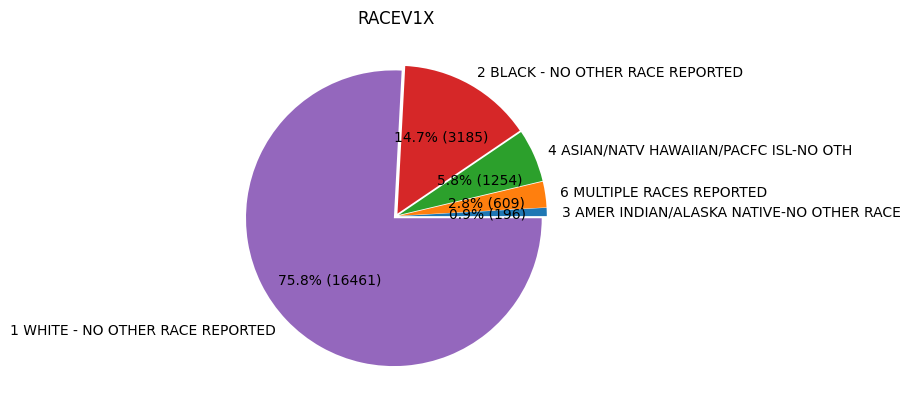

In [52]:
sf.pie(df[race_feat])

In [53]:
df[race_feat].head()

0    2 BLACK - NO OTHER RACE REPORTED
1    2 BLACK - NO OTHER RACE REPORTED
3    1 WHITE - NO OTHER RACE REPORTED
4    1 WHITE - NO OTHER RACE REPORTED
5    1 WHITE - NO OTHER RACE REPORTED
Name: RACEV1X, dtype: object

Convert values to readable short names:

In [54]:
df[race_feat] = df[race_feat].str.replace(r' - NO OTHER RACE REPORTED$', '', regex=True)
df[race_feat] = df[race_feat].str.replace(r'-NO OTH$', '', regex=True)
df[race_feat] = df[race_feat].str.replace(r'-NO OTHER RACE$', '', regex=True)
df[race_feat].head()

0    2 BLACK
1    2 BLACK
3    1 WHITE
4    1 WHITE
5    1 WHITE
Name: RACEV1X, dtype: object

In [55]:
df[race_feat] = df[race_feat].replace(
    {
        "3 AMER INDIAN/ALASKA NATIVE": "3 INDIAN/\nALASKA",
        "4 ASIAN/NATV HAWAIIAN/PACFC ISL": "4 ASIAN/\nHAWAIIAN",
        "6 MULTIPLE RACES REPORTED": "6 MULTIPLE",
    }
)

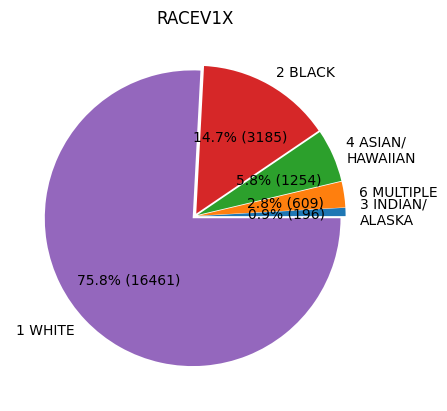

In [56]:
sf.pie(df[race_feat])

In [57]:
df[race_feat].value_counts()

RACEV1X
1 WHITE               16461
2 BLACK                3185
4 ASIAN/\nHAWAIIAN     1254
6 MULTIPLE              609
3 INDIAN/\nALASKA       196
Name: count, dtype: int64

### Cancer diagnosis

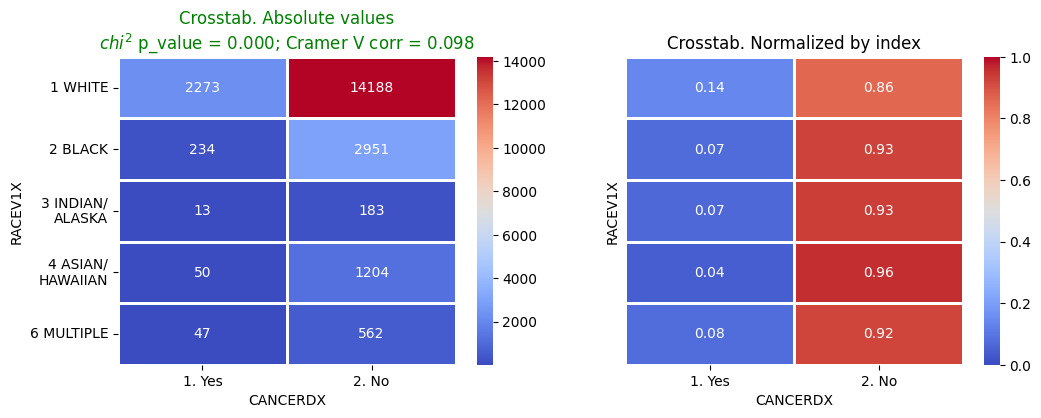

In [58]:
tf.crosstab(df, race_feat, cancer_feat, figsize=(12, 4))
plt.yticks([]);

#### Conclusion

* A Chi-square test comparing cancer diagnosis (yes/no) across racial groups shows a statistically significant association (χ² p-value = 0.000), with a **Cramér’s V of 0.098**, suggesting a **weak but non-negligible relationship** between race and cancer diagnosis rates.  
However, when examining the actual distributions, it becomes clear that this association is **primarily driven by the overrepresentation of White individuals among those diagnosed with cancer**, and the **underrepresentation of Indigenous people, and Asian and Pacific Islander individuals**. This pattern greatly influences the statistical result and should be acknowledged as the main contributor to the observed association.

* This finding **reflects real-world disparities** documented in epidemiological literature. Studies consistently show that **White populations tend to have higher reported rates of cancer diagnosis**, partly due to **better access to screening and healthcare** services ([DeSantis et al., 2019](https://doi.org/10.3322/caac.21555); [Siegel et al., 2023](https://doi.org/10.3322/caac.21763)). In contrast, **underdiagnosis** or **delayed diagnosis** is more common in minority racial groups due to socioeconomic and structural barriers ([Williams & Mohammed, 2009](https://doi.org/10.1007/s10865-008-9185-0)).

---

<font color='blue'><p style="font-size:20px;">**In summary**</p></font>
The observed racial differences in cancer diagnosis may stem from a combination of **biological**, **environmental**, and especially **structural healthcare access factors**, consistent with public health literature.

### Cancer types

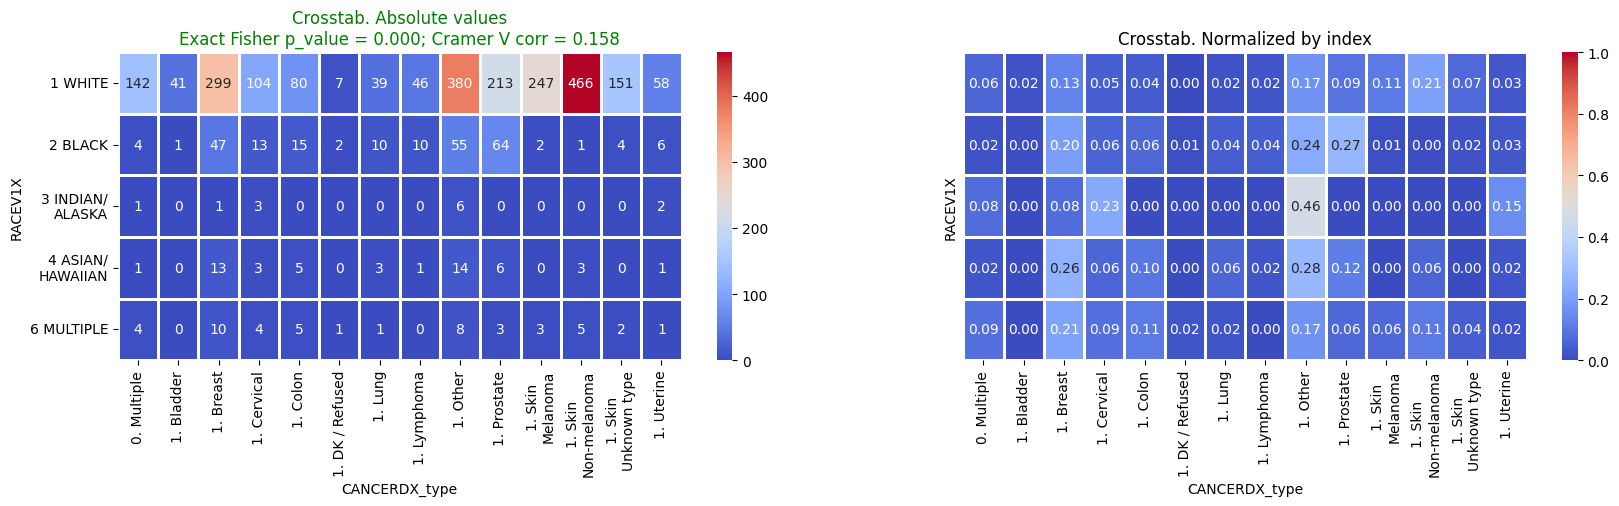

In [59]:
tf.crosstab(df[df[cancer_feat_type]!=no_ans], race_feat, cancer_feat_type, figsize=(20, 4))
plt.yticks([]);

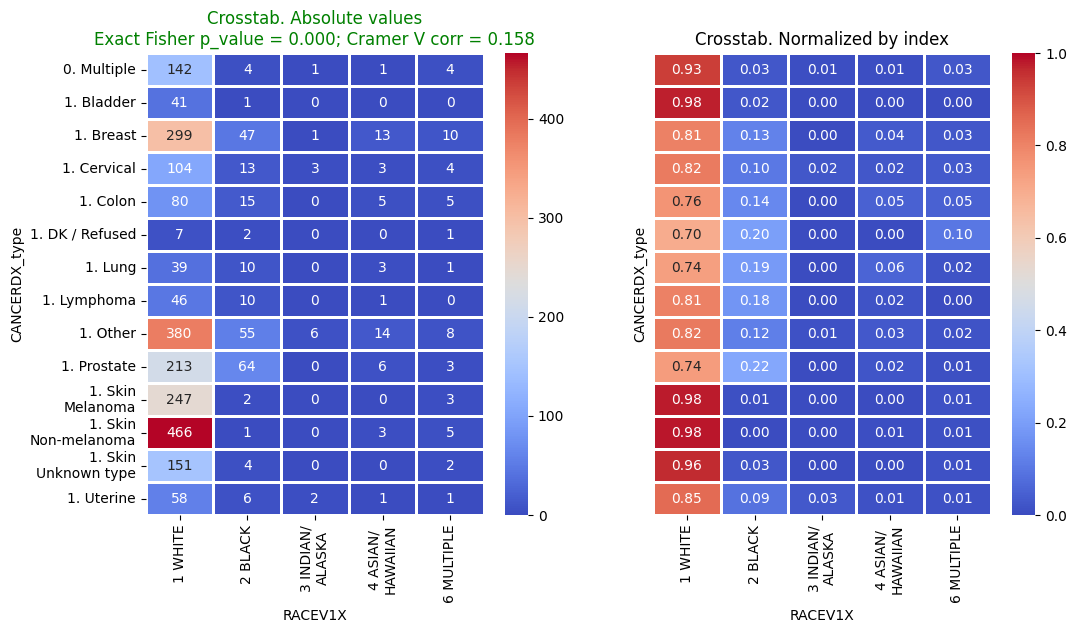

In [60]:
tf.crosstab(df[df[cancer_feat_type]!=no_ans], cancer_feat_type, race_feat, figsize=(12, 6))
plt.yticks([]);

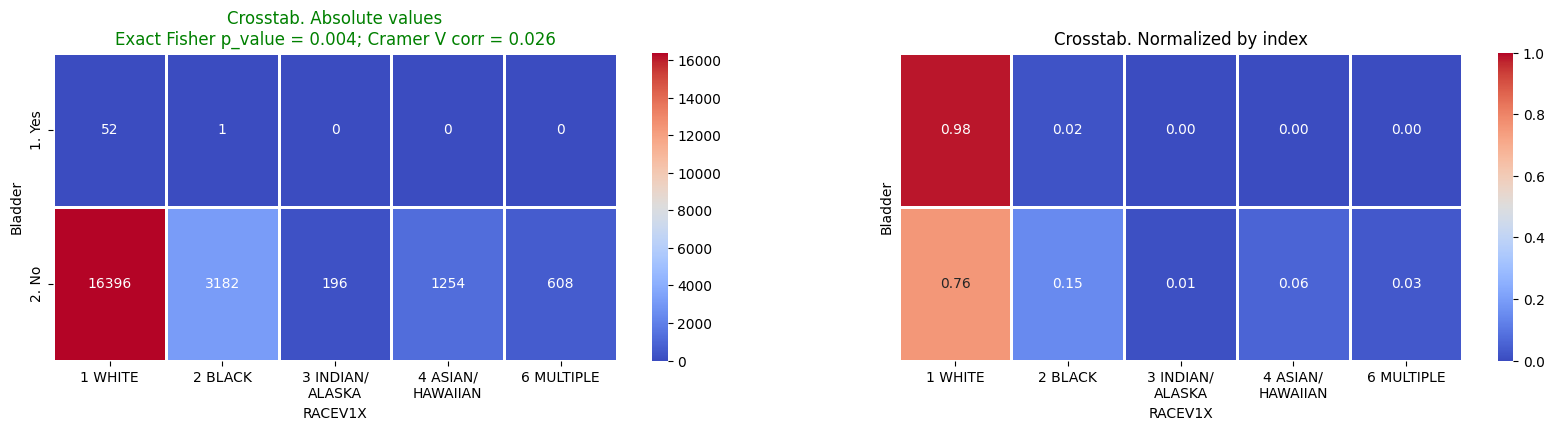

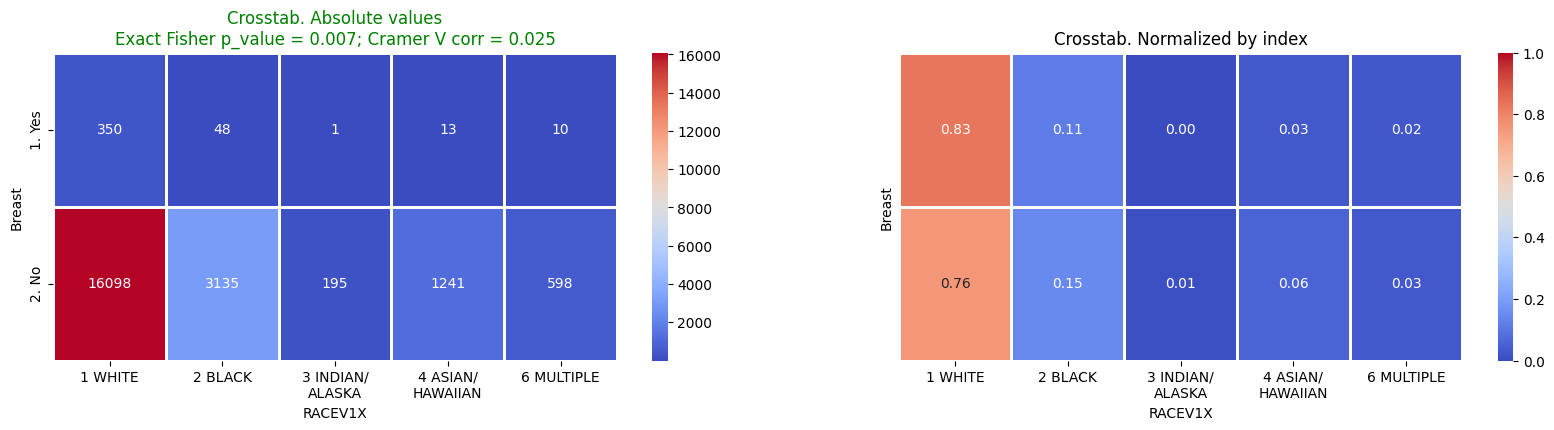

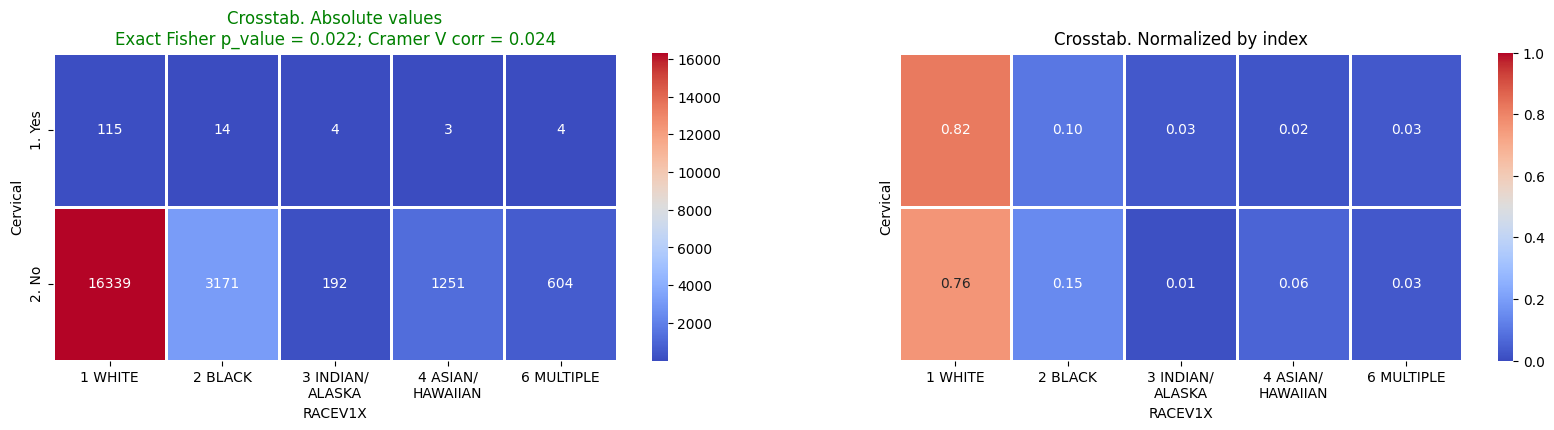

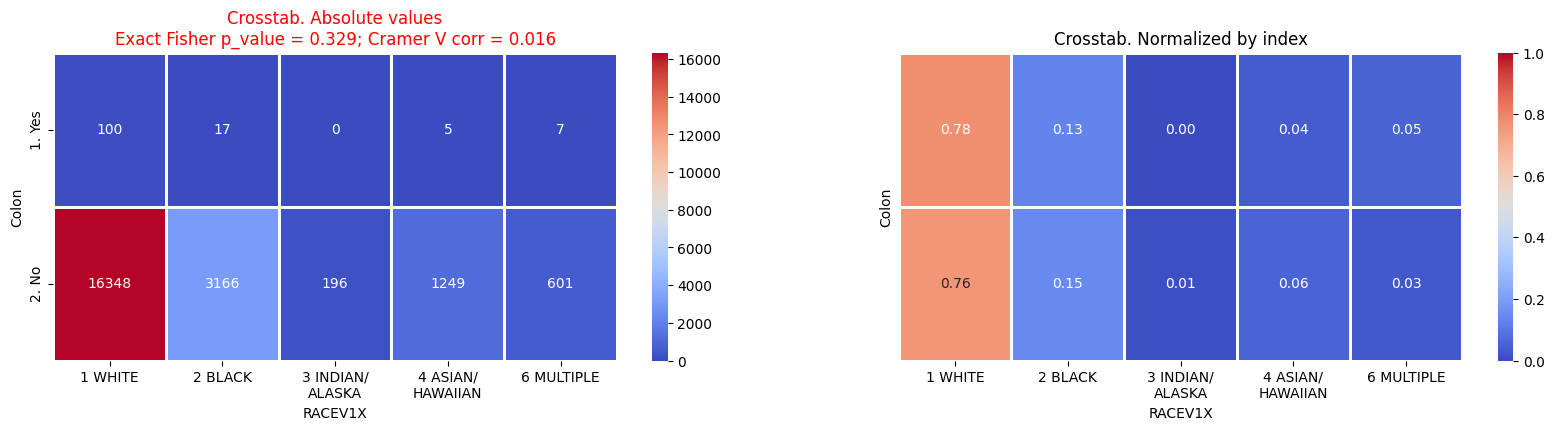

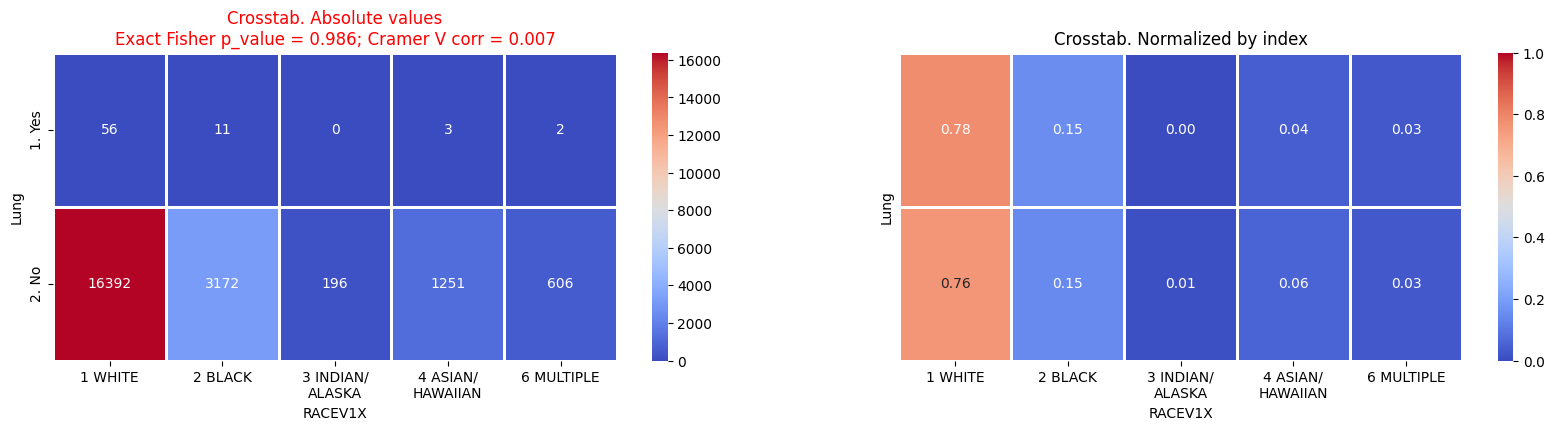

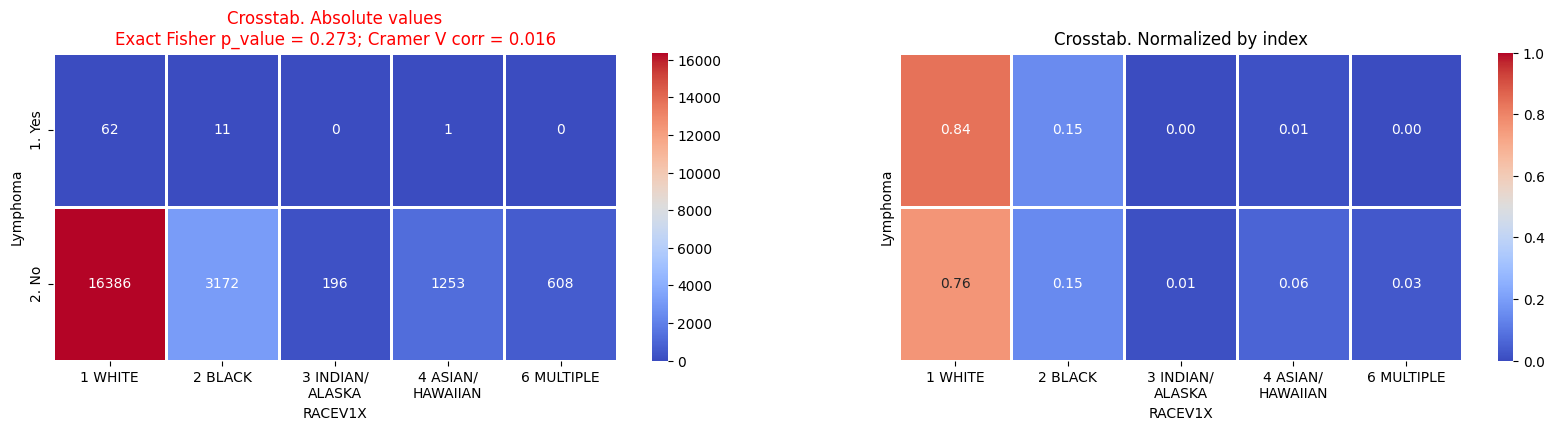

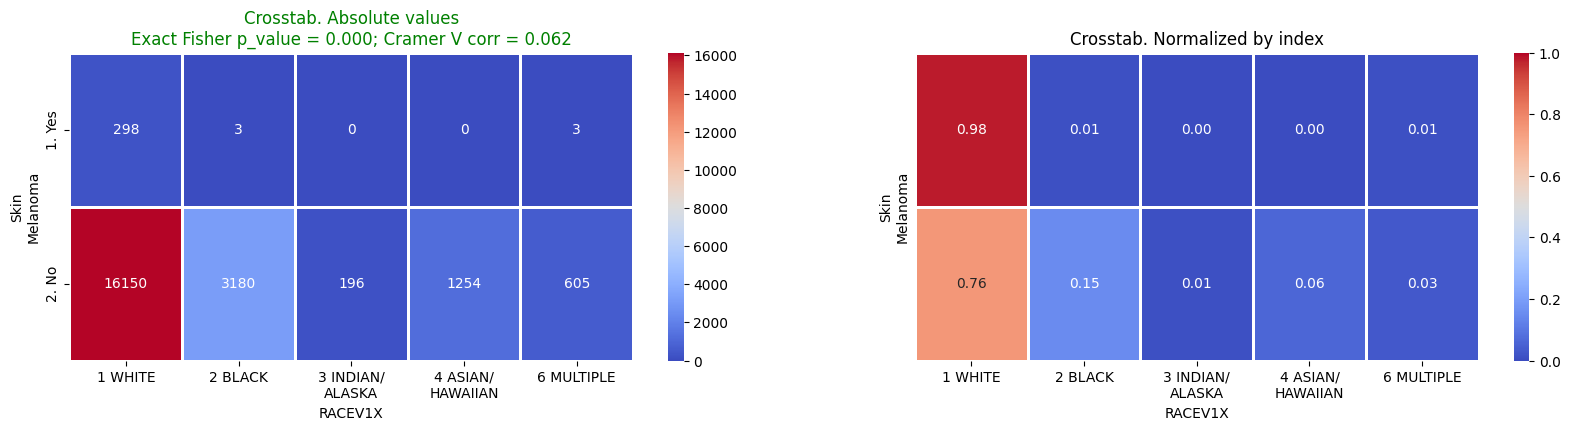

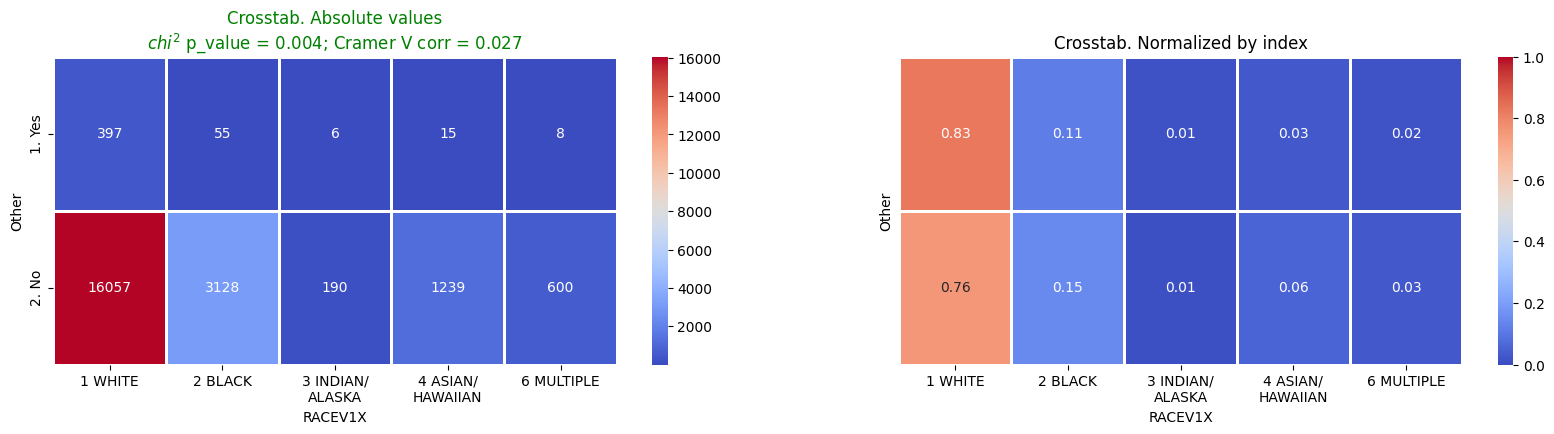

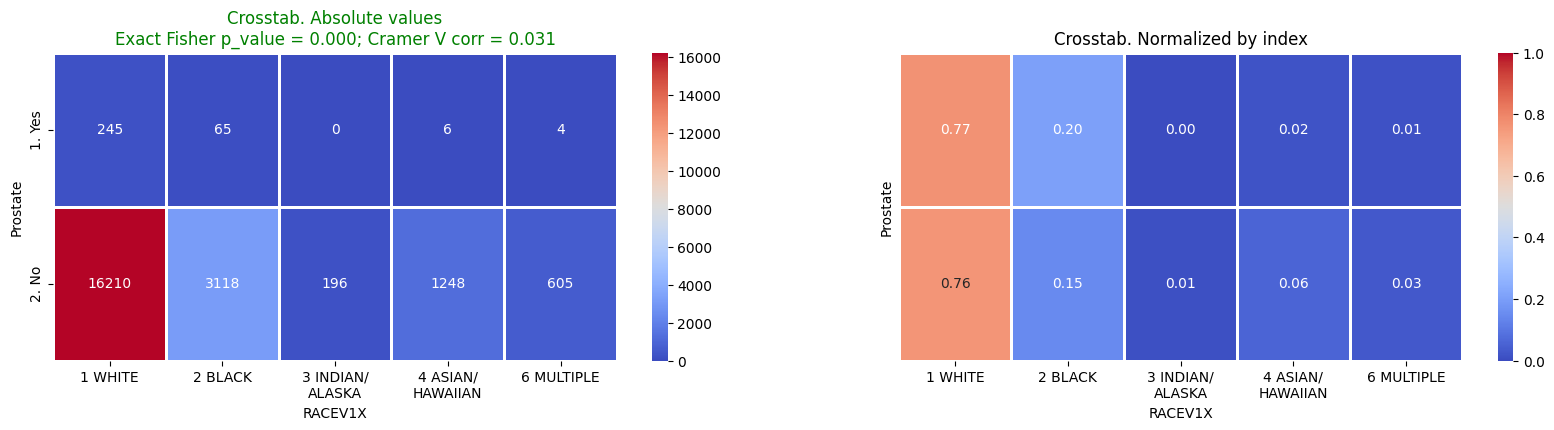

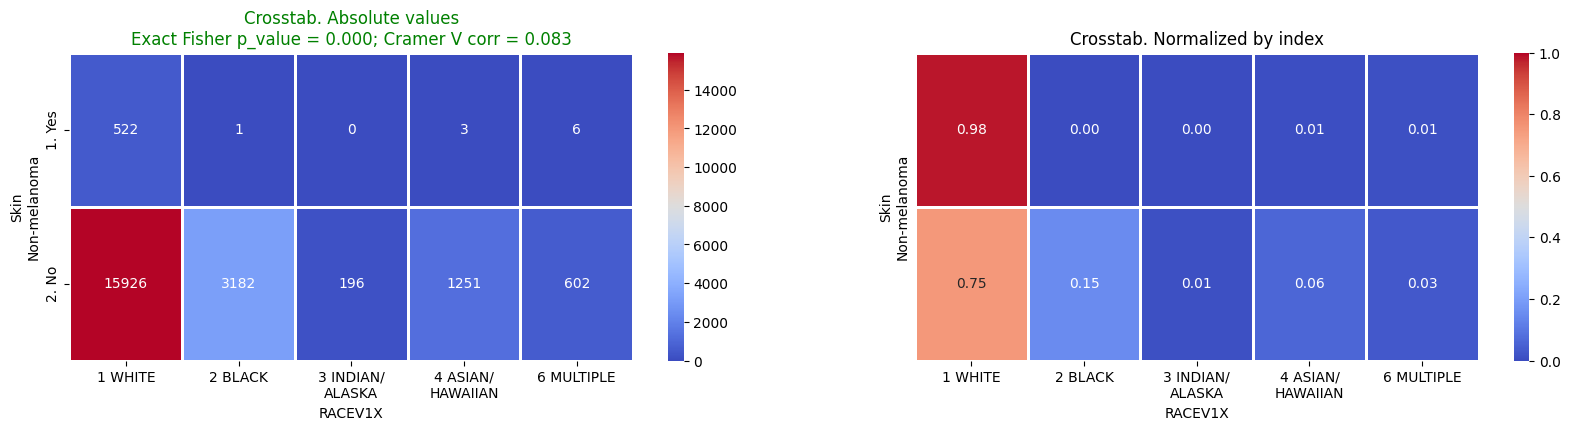

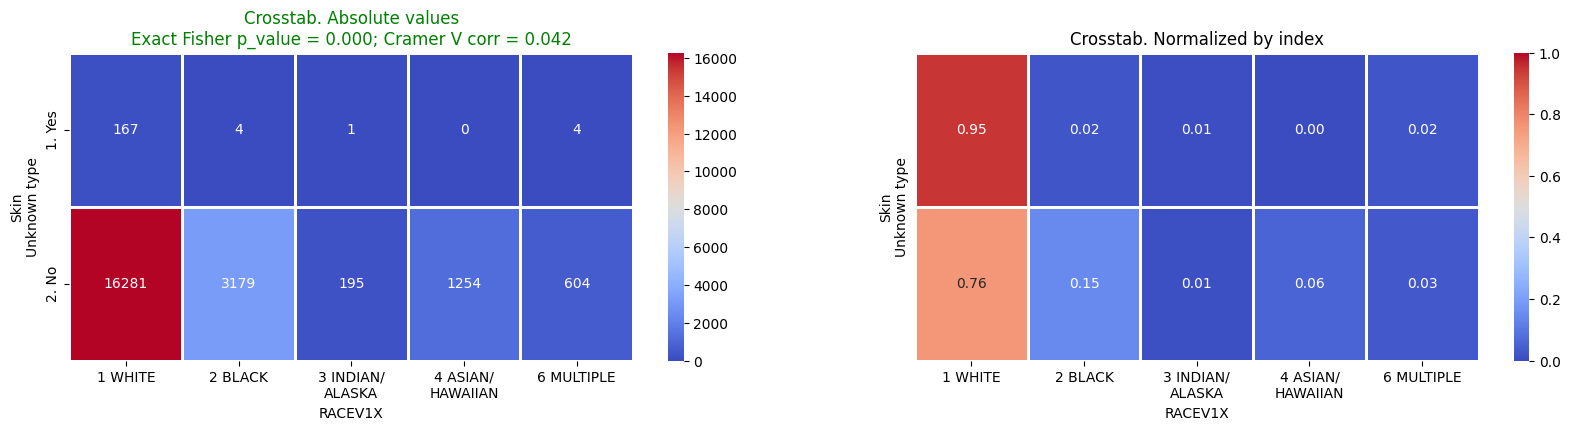

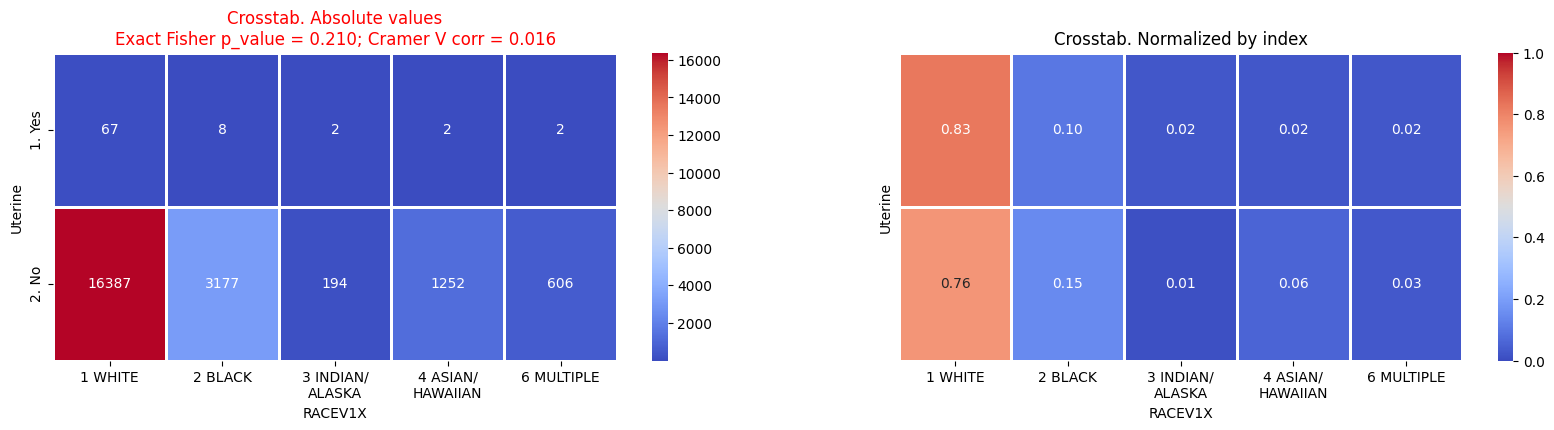

In [61]:
for col in cancer_types:
    tf.crosstab(df, col, race_feat, figsize=(20, 4))
    plt.yticks([]);
    plt.xticks(rotation=0);

In [62]:
df.groupby(cancer_feat_type)[race_feat].describe()

,count,unique,top,freq
CANCERDX_type,,,,
0. Multiple,152,5,1 WHITE,142
1. Bladder,42,2,1 WHITE,41
1. Breast,370,5,1 WHITE,299
1. Cervical,127,5,1 WHITE,104
1. Colon,105,4,1 WHITE,80
1. DK / Refused,10,3,1 WHITE,7
1. Lung,53,4,1 WHITE,39
1. Lymphoma,57,3,1 WHITE,46
1. Other,463,5,1 WHITE,380


In [63]:
df[df[cancer_feat_type]!=no_ans].groupby(race_feat)[cancer_feat_type].describe()

,count,unique,top,freq
RACEV1X,,,,
1 WHITE,2273,14,1. Skin\nNon-melanoma,466
2 BLACK,234,14,1. Prostate,64
3 INDIAN/\nALASKA,13,5,1. Other,6
4 ASIAN/\nHAWAIIAN,50,10,1. Other,14
6 MULTIPLE,47,12,1. Breast,10


#### Conclusion

* A **Fisher’s exact test** comparing racial distributions across **cancer types** yields a **statistically significant association** (p-value = 0.000), with a **Cramér’s V of 0.158**, suggesting a **moderate relationship** between race and the type of cancer diagnosed.

* When reviewing the distribution table, the association is **primarily driven by the overrepresentation of White individuals across most cancer types**, particularly in **skin non-melanoma cancers**. In contrast, **Black individuals are more represented** in **prostate cancer** compared to other cancers and racial groups, though overall counts remain lower than in White individuals. **Asian and Pacific Islander individuals**, as well as **American Indian/Alaska Native groups**, are underrepresented across nearly all cancer types.

* This pattern aligns with **real-world epidemiological data**. For example, **White populations tend to show higher reported incidences of skin and breast cancers**, partly due to both **biological predisposition** and **more frequent screening** ([Siegel et al., 2023](https://doi.org/10.3322/caac.21763)). Meanwhile, **Black men have the highest rates of prostate cancer incidence and mortality**, as extensively documented in the U.S. cancer surveillance data ([DeSantis et al., 2019](https://doi.org/10.3322/caac.21555)).

* The **underrepresentation of Asian and Indigenous populations** in cancer diagnosis may reflect both **true incidence differences** and **diagnostic or reporting disparities**, stemming from **healthcare access inequalities**, **cultural factors**, and **systemic under-screening** ([Williams & Mohammed, 2009](https://doi.org/10.1007/s10865-008-9185-0)).

* However, the most striking difference is seen in **skin-related cancers** — especially **non-melanoma skin cancer**, where **White individuals are heavily overrepresented**. This aligns with well-documented evidence that **lighter skin pigmentation increases vulnerability to UV damage**, contributing to higher rates of basal and squamous cell carcinomas in White populations ([Gloster & Neal, 2006](https://pubmed.ncbi.nlm.nih.gov/17052479/)).  
By contrast, **Asian, Black, and Native American populations** show **substantially lower counts** for skin cancers, likely due to **greater melanin protection** and possibly **underdiagnosis or lower healthcare access**.  
Thus, the **overall moderate association** between race and cancer type is, probably, **primarily driven by skin-related cancers**, particularly among White individuals, rather than by breast or prostate cancers.


---

<font color='blue'><p style="font-size:16px;">**Comparison with [National Cancer Statistic](https://www.cancer.gov/about-cancer/understanding/disparities):**</p></font>
* **Prostate cancer**: more common among **Black/African** American men, consistent with national statistics. Nationally, Black men also have more than double the prostate cancer mortality rates compared to White men.

* **Breast cancer**: more common among **White** women, aligning with national incidence data (though not mortality). However, nationally, Black/African American women are more likely to die from breast cancer despite slightly lower incidence rates.

* **Cervical cancer**: **contrary** to national data, less common among **Black/African** American women than White women in the dataset.

* **Cervical cancer** in American **Indian/Alaska** Native: higher proportion observed, but the small absolute number of cases (3) limits interpretation.

---

<font color='blue'><p style="font-size:20px;">**In summary**</p></font>
The observed racial differences in cancer types reflect a complex interaction of **biological risk factors**, **screening prevalence**, and **healthcare accessibility**, with patterns consistent with known disparities in cancer epidemiology.